## Project: Alternus Vera (Alternate Facts)  

                                                                                         Name : Anu Sebastian
                                                                                         SJSU Id : 012496276

### Problem Statement: 
    There is huge amount of information being generated and propogated on the internet. Unreliable sources of information expose people to a dose of fake news, hoaxes, rumors, conspiracy theories and misleading news. “Fake news” has acquired a certain legitimacy after being named word of the year by Collins, following what the dictionary called its “ubiquitous presence” over the last 12 months. Fake news is fueled in part by advances in technology — from bots that automatically fabricate headlines and entire stories to computer software that synthesizes voice and creates authentic-looking videos in which one person’s face is stitched onto another person’s body. But technology, in the form of artificial intelligence, may also be the key to solving the fake news problem — which has rocked the American political system and led some to doubt the veracity even of reports from long-trusted media outlets.This project explores the application of natural language processing techniques for the detection of `fake news'or misleading news stories.

### Following are the datasets explored as part of this project 

- Kaggles fake news dataset for Fake news 
- NYT API and The Guardian Post API to get real news
- LIAR dataset: https://www.cs.ucsb.edu/william/data/liar_dataset.zip
- BS Detector: https://github.com/bs-detector/bs-detector
- CredBank: compsocial.github.io/CREDBANK-data
- Buzzfeed News: https://github.com/BuzzFeedNews/everything
- Corpus of News on the Web (NOW): https://corpus.byu.edu/now/
- Google trends: https://trends.google.com/trends/
- Click Bait(y) dataset from Kaggle: The Examiner - SpamClickBait News Dataset: https://www.kaggle.com/therohk/examine-the-examiner
- Click Bait Challenge: https://www.clickbait-challenge.org/#data

###  Classification of news from websites/links/text:

- Fake News: Sources that fabricate stories out of whole cloth with the intent of pranking the public.
- Satire: Sources that provide humorous commentary on current events in the form of fake news.
- Extreme Bias: Sources that traffic in political propaganda and gross distortions of fact.
- Conspiracy Theory: Sources that are well-known promoters of kooky conspiracy theories.
- Rumor Mill: Sources that traffic in rumors, innuendo, and unverified claims.
- State News: Sources in repressive states operating under government sanction.
- Junk Science: Sources that promote pseudoscience, metaphysics, naturalistic fallacies, and other scientifically dubious claims.
- Hate Group: Sources that actively promote racism, misogyny, homophobia, and other forms of discrimination.
- Clickbait: Sources that are aimed at generating online advertising revenue and rely on sensationalist headlines or eye-catching pictures.
- Proceed With Caution: Sources that may be reliable but whose contents require further verification.

Reference : http://bsdetector.tech/

###### Below features which we found would be good to categorise whether the article/news is fake or not 

1. Political affiliation
2. Social Media
3. Context
4. Rumour Analysis 
5. Bias
6. Content 
7. Marketing
8. Domain Ranking
9. Malicious accounts
10. Authenticity
11. Spam detection
12. Credibility
13. Stance detection
14. Click-Bait

### Features for the Alternus Vera  and importance as determined from the readings and documents

1. Political affiliation - Kaggle /Liar -Liar + NYT + Guardian - 26%
2. Social Media (yellow press + internet) - https://github.com/KaiDMML/FakeNewsNet + Kaggel dataset - 7%
3. Bias - https://github.com/clips/news-audit - 25%
4. Hate News - 8%
5. Credibility - 24%
6. Fact checks https://github.com/sumeetkr/AwesomeFakeNews + dataset in the git link - 10%




##  WorkFlow 

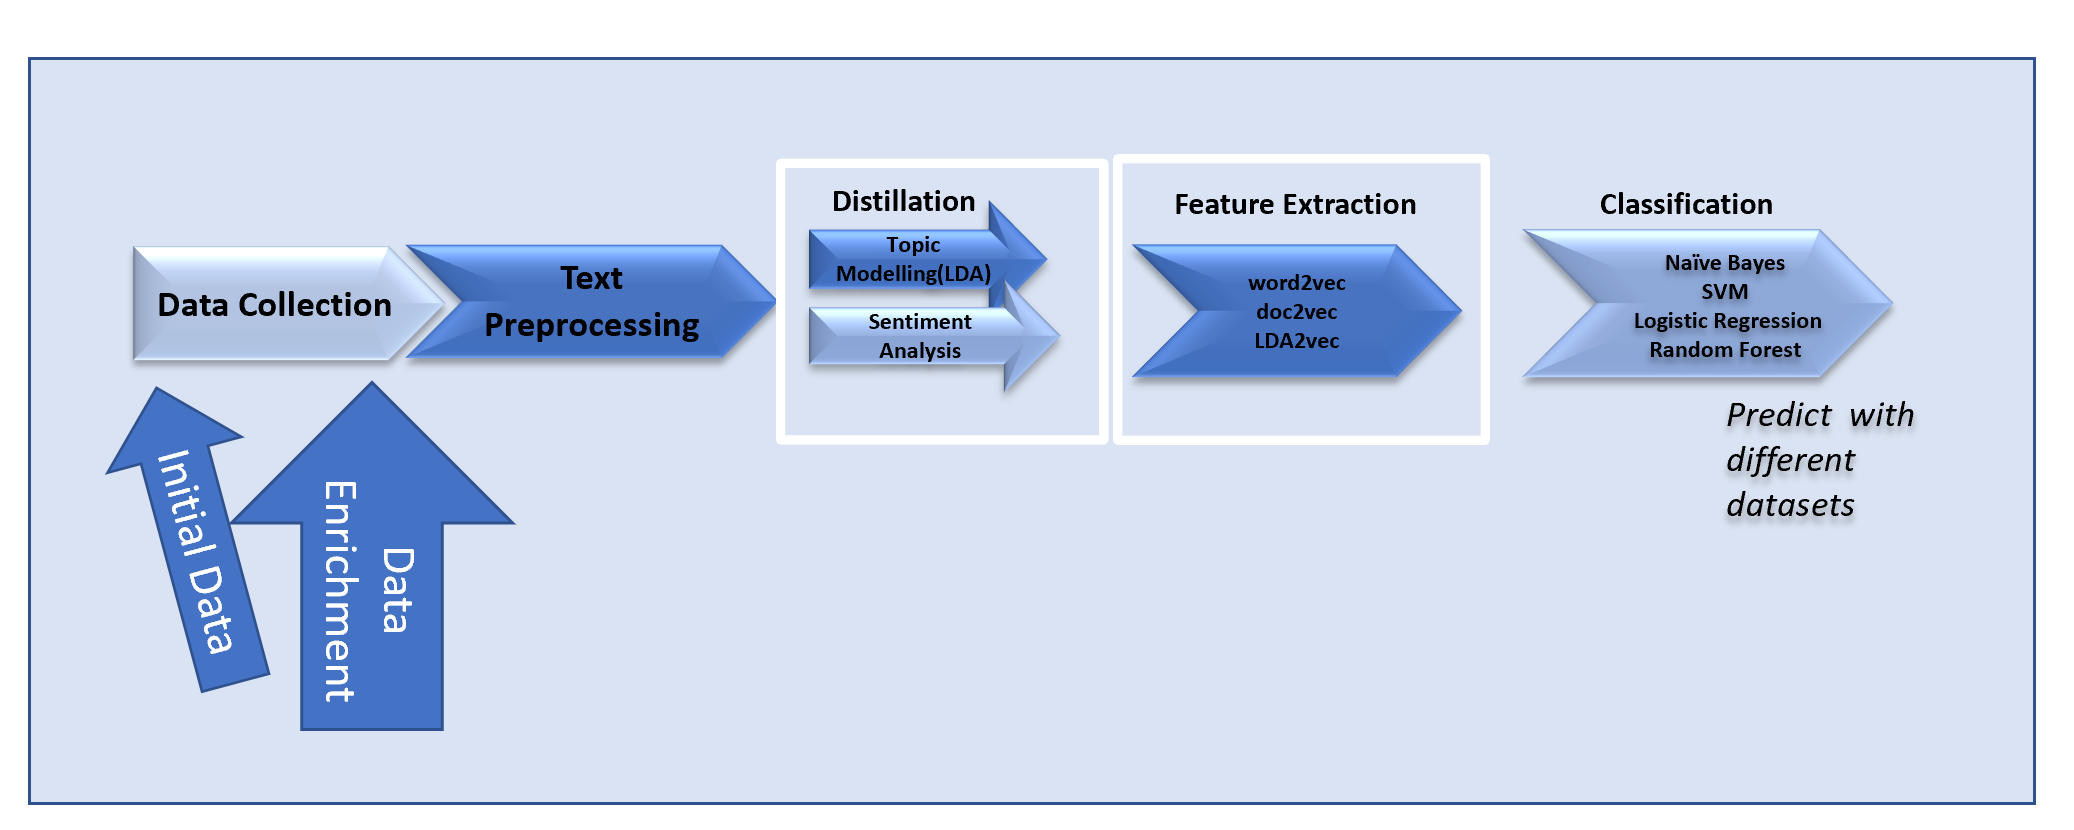

## Feature 1: Initial Dataset - LIAR Dataset  - for political affiliation

William Yang Wang introduced a daataset called LIAR. This is a new, publicly available data set for detection of fake news. Automatic fake news detection is a challenging problem in deception detection, and it has tremendous real-world political and social impacts. However, statistical approaches to combating fake news has been dramatically limited by the lack of labeled benchmark datasets. In this paper, we present liar: a new, publicly available dataset for fake news detection. We collected a decade-long, 12.8K manually labeled short statements in various contexts from PolitiFact.com, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type.

Reference: https://www.researchgate.net/publication/316643096_Liar_Liar_Pants_on_Fire_A_New_Benchmark_Dataset_for_Fake_News_Detection

=====================================================================
Description of the TSV format:

- Column 1: the ID of the statement ([ID].json).
- Column 2: the label.
- Column 3: the statement.
- Column 4: the subject(s).
- Column 5: the speaker.
- Column 6: the speaker's job title.
- Column 7: the state info.
- Column 8: the party affiliation.
- Column 9-13: the total credit history count, including the current statement.
    - 9: barely true counts.
    - 10: false counts.
    - 11: half true counts.
    - 12: mostly true counts.
    - 13: pants on fire counts.
- Column 14: the context (venue / location of the speech or statement).

Note that we do not provide the full-text verdict report in this current version of the dataset,
but you can use the following command to access the full verdict report and links to the source documents:
wget http://www.politifact.com//api/v/2/statement/[ID]/?format=json


## Data Enrichment
- Kaggle Dataset for Fake News - Using the  'text' field in the fakenews.csv to enrich the data.
- New York Times articles    - nytimes_news_articles.txt

## Text Preprocessing 

### 1. Cleaning 

- Converting text to lower case 
        - assuming the corpus is in english , I do not want words starting with capital letter at the beginning of the sentence and the same word occuring in the sentence to be treated differently. 
- Stopword removal
- Removing punctuation 

### 2. Annotation
    - Annotation is based on evaluations by professional editors. The labels take discrete values from 1 to 6 corresponding to pants-fire, false,barely-true, half-true, mostly-true, and true.

The statements are categorised into the following labels 
1. pants-fire
2. FALSE
3. barely-true 
4. half-true
5. mostly-true
6. TRUE

### 3. Normalization 
    - linguistic reduction 
1. Stemming
2. Lemmatization


### Order matters in preprocessing !!

The order of steps in text processing matters a lot if you are trying to extract other features alongside a simple "Bag of Words" or "Word Salad" model. For instance, if you want to count the number of question marks in the email text then you should probably do it before removing all punctuation, but after replacing all http addresses (which sometimes contain special characters).

Here is a rough outline of all the steps we'll take to get from a messy, marked-up raw text to a delicious word salad:
- Strip any HTML tags and leave only text content (also count HTML tags)
- Lowercase everything
- Strip all email and web addresses (also count them)
- Strip all dollar signs and numbers (also count them)
- Strip away all other punctuation (also count exclamation and question marks)
- Standardize all white space to single space (also count newlines and blank lines)
- Count the total number of words in our word salad
- Strip away all useless "Stopwords" (like "a", "the", "at")
- Stem and lemmatize all the words down to their root to simplify

count really means to substitute each occurrence with some fixed string: like every web address gets replaced with "httpaddr". That way when we ultimately convert each email to a vector of word counts, we'll get a feature that reflects the occurrence of the word "httpaddr".

Reference: http://sdsawtelle.github.io/blog/output/spam-classification-part1-text-processing.html

In [6]:
import pandas as pd

data_train = pd.read_csv('C:/Fall2018/ML/train_l.csv');
data_test=pd.read_csv('C:/Fall2018/ML/test_l.csv')

In [9]:
data_train.head(5)

,ID,label,statement,subjects,speaker,speaker's_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on _fire_counts,context,bag_of_words
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,NaN
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,NaN
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,NaN
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,NaN
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,NaN


### Looking for the type of data variables in the dataset 

In [10]:
data_train.columns.values

array(['ID', 'label', 'statement', 'subjects', 'speaker',
       "speaker's_job_title", 'state_info', 'party_affiliation',
       'barely_true_counts', 'false_counts', 'half_true_counts',
       'mostly_true_counts', 'pants_on _fire_counts', 'context',
       'bag_of_words'], dtype=object)

### Dimension of the data 

In [11]:
data_train.shape

(10269, 15)

### Distribution of fake news in the dataset

In [12]:

data_train.label.value_counts()

half-true      2123
FALSE          1998
mostly-true    1966
TRUE           1683
barely-true    1657
pants-fire      842
Name: label, dtype: int64

### Visualize the data

###  The data looks to be equally distributed - though the pants fire has a lower count.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
data_train.label.value_counts().plot(kind='bar',title = 'Frequency of Observations by Type', grid = True)

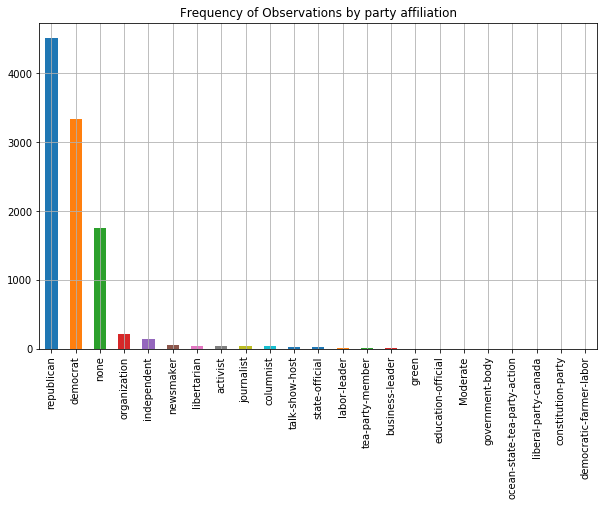

In [14]:
data_train.party_affiliation.unique()
len(data_train.party_affiliation.unique())
plt.figure(figsize=(10,6))
data_train.party_affiliation.value_counts().plot(kind='bar',title = 'Frequency of Observations by party affiliation', grid = True)

In [15]:
data_train.subjects.unique()

array(['abortion', 'energy,history,job-accomplishments', 'foreign-policy',
       ..., 'animals,elections', 'retirement,social-security',
       'florida,foreign-policy'], dtype=object)

In [16]:
len(data_train.subjects.unique())

3803

### Chek the data in the statements column 

In [17]:
from random import *

for i in range(0,10):
    x = randint(0, 100)    # Pick a random number between 1 and 100.
    print (data_train["statement"][x])

Maggie Hassan raised tuition, making it the highest in America.
The United States has the highest corporate tax rate in the free world.
U.S. Rep. Ron Kind, D-Wis., and his fellow Democrats went on a spending spree and now their credit card is maxed out
Says Ohio budget item later signed into law by Gov. John Kasich requires women seeking an abortion to undergo a mandatory vaginal probe.
Only 2 percent of public high schools in the country offer PE classes.
Says the Annies List political group supports third-trimester abortions on demand.
When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
Under Obama, home values in Florida collapsed, construction jobs were lost and the state had a high foreclosure rate.
Since 1968, more Americans have died from gunfire than died in all the wars of this countrys history.
In 2008, only 54 percent of Latinos in Texas were registered to vote and only 35 percent actua

### Check if there are reoccuring statements in the 'statement' column 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cnt_pro = data_train['statement'].value_counts()
print(cnt_pro)

cnt_subjects = data_train['subjects'].value_counts()
print(cnt_subjects)

On changing the rules for filibusters on presidential nominees                                                                                                                                                                3
On support for the Export-Import Bank                                                                                                                                                                                         2
Twenty million Americans are out of work.                                                                                                                                                                                     2
Six justices on the U.S. Supreme Court have been confirmed in presidential election years since 1912.                                                                                                                         2
On abortion                                                                                             

### Tools explored/used for preprocessing : "re" Library, Potter Stemmer, Beautiful Soup, nltk 

### Text Preprocessing Step 1: Converting the 'statement' column to all lower case 

### Text Preprocessing Step 2: Strip all dollar signs,numbers and punctuation (also count them)
### Strip away all other punctuation + Standardize all white space to single space

###  Text Preprocessing Step 3: Remove Stop Words with nltk

Tools for preprocessing:

- re for regular expressions to do Natural Language Processing (NLP)
- stopwords text corpus for removing information-poor words in NLP
- SnowballStemmer for stemming text in NLP
- BeautifulSoup for HTML parsing


In [19]:
import re
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
def preprocess_doc(body):

    
    # Replace all numbers with special strings
    regx = re.compile(r"\b[\d.]+\b")
    body = regx.sub(repl=" number ", string=body)

    # Replace all $, ! and ? with special strings
    regx = re.compile(r"[$]")
    body = regx.sub(repl=" dollar ", string=body)
    regx = re.compile(r"[!]")
    body = regx.sub(repl=" exclammark ", string=body)
    regx = re.compile(r"[?]")
    body = regx.sub(repl=" questmark ", string=body)

    # Remove all other punctuation (replace with white space)
    regx = re.compile(r"([^\w\s]+)|([_-]+,)")  
    body = regx.sub(repl=" ", string=body)
    
    # Replace all newlines and blanklines with special strings
    regx = re.compile(r"\n")
    body = regx.sub(repl=" newline ", string=body)
    regx = re.compile(r"\n\n")
    body = regx.sub(repl=" blankline ", string=body)

    # Make all white space a single space
    regx = re.compile(r"\s+")
    body = regx.sub(repl=" ", string=body)

    # Remove any trailing or leading white space
    body = body.strip(" ")
 
    # Remove all useless stopwords
    bodywords = body.split(" ")
    keepwords = [word for word in bodywords if word not in stopwords.words('english')]

    # Stem all words
    stemmer = SnowballStemmer("english")
    stemwords = [stemmer.stem(wd) for wd in keepwords]
    body = " ".join(stemwords)

    # lowercase everything
    body = body.lower()
    
    return body 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from nltk.corpus import stopwords
for (index, row) in data_train['statement'].iteritems():
    data_train['bag_of_words'][index] = preprocess_doc(row)  
    print(data_train['bag_of_words'][index])

C:\Users\anuks\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anuks\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


say anni list polit group support third trimest abort demand
when declin coal start questmark it start natur gas took start begin presid georg w bush administr
hillari clinton agre john mccain vote give georg bush benefit doubt iran
health care reform legisl like mandat free sex chang surgeri
the econom turnaround start end term
the chicago bear start quarterback last number year total number tenur uw faculti fire last two decad
jim dunnam live district repres year
i person stage work activ last year pass along russ feingold toughest ethic reform sinc waterg
howev took dollar number million oregon lotteri fund port newport eventu land new noaa marin oper center pacif
say gop primari oppon glenn grothman joe leibham cast compromis vote cost dollar number million higher electr cost
for first time histori share nation popular vote margin smaller latino vote margin
sinc number near number million american slip middl class poverti
when mitt romney governor massachusett didnt slow rate growt

the ir also investig liber group group progress name the ir basic look everybodi
say obama promis unemploy would never go number percent
the economi creat job fastest pace sinc number
presid obama decid meet prime minist benjamin netanyahu new york
in major state marri freeli still fire love
say oregon rep peter defazio earl blumenau socialist open serv u number s congress
rudi giuliani probabl underqualifi man sinc georg bush seek presid
about half presid governor half senat
after britain vote leav european union within number hour american lost dollar number billion number k
medicaid spend declin number percent number second declin number year
say number texa constabl die line duti
gov rick scott cut cost prepaid colleg tuition near dollar number number
the citi columbus would save dollar number million year employe contribut guarante check pension
as florida cfo i shut krakow scam refund dollar number million josephin victim con man
you women get comput scienc degre 80s factor numbe

militari recruit went harvard everi singl day throughout time kagan
say rick perri plan texa cut fund public school number
say david perdu want abolish u number s depart educ would cost georgia school dollar number billion year elimin million student loan
the paul ryan budget propos would privat medicar
high school student arrest campus twice like graduat four time less like graduat theyv appear court
the unit state imprison nation world
say marco rubio one open border
over number year feder spend educ grown number percent test score remain flat
say cut medicar affect peopl alreadi paid we paid
david alameel give thousand dollar support republican parti candid includ john cornyn greg abbott
the american healthcar system burn number percent nation gdp nobodi els close
provid port number mile closer europ eastern port
say need photo id purchas sudaf texa
twenti percent hous portland pearl district afford
say allow payrol tax holiday expir would end cost anoth estim number number job numb

the hous repres never pass resolut disapprov condemn member behavior
we younger competitor entir immigr
recent intern report show unit state near bottom among industri nation k number academ achiev
say number million peopl countri cant find full time job number million cant see doctor theyr sick number million peopl need govern help feed number million famili owe valu home
the polici mistak clinton made got us larg degre situat today mass incarcer
say rais averag famili incom number percent tenur arkansa governor
they tri give us dollar number million build high speed train goe number mile hour
say cbo estim fulli extend bush tax cut would add number number number million job number number number number million job number
presid reagan rais debt ceil number time georg w bush seven time
accord david cay johnston averag american pay number percent incom feder tax the richest number american pay number percent incom feder tax
most young american right theyr cover health insur
in number co

there even republican congressmen said if give us money dont know would even put addit border patrol agent
today first time fifteen year master lock union plant milwauke run full capac
tom reed actual vote everi singl trade deal ever come form
isi camp mile texa mexican author confirm
new feder project estim health care overhaul cost dollar number trillion number year well dollar number billion democrat origin claim
say new jersey rep donald payn frank pallon socialist open serv u number s congress
the unemploy rate may high number percent
common core feder govern fingerprint thing
social secur inde ponzi scheme
say scott walker brag lot independ agenc investig polic shoot of cours didnt fund
what arizona law make state crime someth alreadi feder crime
when countri found congress exact attitud sanctiti christma celebr number eleven today yeah open
in miami dade counti spend school system dollar number million everi year educ recent immigr
the omnibus bill dollar number billion earmark


despit keep distanc nation media interview i local press along last three month
what said keep plan hasnt chang sinc law pass
in number berni sander vote hous hard line republican indefinit detent undocu immigr side republican stand vigilant known minutemen take outpost along border hunt immigr
say florida didnt offer special incent deutsch bank announc add number job florida
say first famili go four year colleg
there gallup poll egypt last year number percent egyptian dont want money
the truth matter administr fbi crime statist show violent crime reduc massachusett number percent
scott maddox run lose campaign number florida number avail cabinet posit
american spend number billion hour year tax prepar
the budget i manag depart educ dollar number million
we first time ever energi independ
last year exxon pocket near dollar number million everi hour
aarp largest resel insur countri vest interest see market resel supplement insur expand
medicar month premium go dollar number number dolla

in number nra leadership washington pretti much peopl intact expand background check
turkey arab countri
newt gingrich presidenti campaign exact challeng ronald reagan success number bid
the number peopl atlanta die hiv aid declin number percent number number
say lee leffingwel rais properti tax number percent three year
accus presid barack obama make contradictori claim effort kill osama bin laden number number
number year clinton major loss democrat across nation
number percent job lost barack obama first term belong women
say presid barack obama respons assassin least four american citizen drone strike
it use polici republican parti get rid depart educ we final get charg chanc someth doubl size depart educ
we number inmat push tripl bunk cell intend two inmat bunk classroom area suppos design inmat labor
the aclu didnt call investig newark polic depart call immedi feder monitor
say execut order requir young girl vaccin hpv wasnt mandatori
say highway close el paso bullet fli across 

not one tax rais sinc ive governor
demand transport choic rise number percent ohioan ride passeng train past year
a poll conduct egypt reveal number percent egyptian oppos receiv foreign aid unit state
we spend twice much per capita health care nation earth
say texa educ agenc follow make sure undocu immigr pay state tuition texa colleg appli perman resid
say number state district columbia vote democrat six consecut presidenti elect
hidden healthcar number gov code languag mean user waiv reason right privaci person inform
one recent poll said number percent american peopl said either anyth start health care reform
most militari expert say anywher number number member al qaeda afghanistan
the averag american work month may pay govern
say kelli ayott stand washington gun lobbi they fund campaign
barack obama network small donor constitut parallel public financ system
in cranston cost dollar number number dollar number number send communiti notif one level number sex offend
while countri 

the unit state major countri earth doesnt guarante health care peopl right privileg
said former u number s ambassador kenya scott gration forc resign two year ago person use email
say florida model success pretrial releas program
if ever visit nashvill washington d number c see mani name initi carv desk
redistribut never characterist america
tampa strip club capit world
said reach power share agreement republican lt gov casey cagl
say number number bicycl park space requir one car
i unseal record marquett univers
say u number s rep allen west constitu mine
the u number s give foreign aid cuba venezuela even though countri enemi
say texa wildfir link climat chang
agreement goe effect million mexican citizen becom elig social secur benefit may far stronger claim benefit protect cut u number s citizen exclammark
earlier year john depetro accus sexual assault femal co worker
photo tea parti protest show crowd sprawl capitol washington monument
the approv unit state number point higher hill

scott walker plan privat state land want sell deer highest bidder
the unit state alli line air strike syria obama pull rug
we saw presid unit state engag american troop fourth conflict foreign land this histor
say hes sign pledg rais tax four time
unemploy texa risen two percentag point rick perri governor
u number s rep paul ryan sean duffi reid ribbl shut town hall meet make constitu pay attend
rick perri think inject number number year old girl controversi drug hpv vaccin without parent consent good idea
a number gay pride vote noth discrimin
the republican still want privat social secur in fact whole idea turn social secur trust fund wall street
on night iowa caucus obama promis nation would health care reform focus cost contain oppos individu mandat said go republican
say florida rubber stamp phoni hors race
one key thing leonard lanc number look project vote smart websit gun now gone far right say carri conceal weapon nation park
say help lead launch curbsid recycl
barack obama w

the wage number number state local govern employe would affect minimum wage increas dollar number georgia combin cost taxpay dollar number million annual
it make sens histor drop number race still competit bobbi kennedi assassin june california
say couldnt keep number inch redfish caught fish rule
say oppon kathi tovo believ austin invest much cop firefight paramed protect famili neighborhood
newt gingrich fine dollar number number ethic violat
the entireti north america canada unit state mexico there known reserv three countri russia saudi arabia
on accuraci state job number
right number percent health insur cover that highest weve ever countri
roy barn proclaim mexican worker good georgia
say india gain job thank romney
onli number percent american admit republican anymor
it cost everi american insur dollar number number pick cost uncompens care goe emerg room
the no number caus death african american males15 number murder
the unit state highest incarcer rate world
the nation debt tr

we number state lobbyist lobbi legislatur money everi year
in atlanta sinc number seven dead sin mandatori minimum sentenc took effect violent crime rate drop number percent
becaus jim whelan 1990s decad sinc 1920s popul atlant citi actual went
say trimet analysi show youthpass actual add transit agenc cost
john mccain offer billion tax break oil drug compani almost noth famili like
we adopt modern social secur system time averag person die old enough get social secur
we come 40th anniversari elect republican unit state senat number last time new jersey sent republican unit state senat
sen sherrod brown vote help pass barack obama job kill health care law slap small busi throughout ohio dollar number billion tax increas
presid obama budget would call dollar number trillion debt end term elect
we know sunday morn usual given conserv white men
rob cornill endors number local mayor includ independ democrat republican
delta anim death among u number s carrier past five year
republican cand

onli number percent voter number number dont believ climat chang realli happen
say u number s senat candid joni ernst support nation minimum wage
birther obtain copi obama kenyan birth certif
keyston mean unlock canadian tar sand
the work tax cut creat number number new job last four year
there least twice mani licens firearm dealer california mcdonald
i play game pittsburgh steeler number inch snow we play least number inch
it depart homeland secur view return militari veteran gun owner like commit terrorist act
data violent crime show wisconsin becom less safe scott walker took offic
the boston marathon bomb fifth case u number s govern offici examin individu potenti involv terror felt threat went carri terrorist murder
in number donald trump hope real estat crash
the republican leadership budget propos contain number
say number number american famili food stamp
the kenosha casino would one state largest employ pay state compani tribe essenti would wisconsin biggest taxpay
our race c

we least number number number number hate crime given year
say legisl assembl within one vote enact bill oregon law
say critic call origin gi bill welfar
the top number percent incom earner paid number percent tax the top number percent pay number percent
milwauke second highest number children recov sex traffick
what social medicin
i endors feder stimulus bill
say wisconsin gov scott walker doesnt make calendar public hes dime dont know
the stimulus creat one privat sector job
what maximum number student allow classroom questmark number exclammark
say central ohio human traffick task forc first task forc kind central ohio
a bill georgia general assembl would make presidenti candid meet citizenship requir u number s constitut
pwned hous gop domin twitter youtub social media congress
american never paid gas pump
virginia paper call scott rigel campaign most fals
say oppos measur weaken dodd frank wall street regulatori bill campaign financ legisl offer stand alon bill
say texa californi

say king street patriot held fundrais featur author believ regist poor vote un american
i one dozen senat vote bridg nowher
on whether run u number s senat independ
say romney uniform number winter olymp game made burma
with one stroke pen presid bush deni health insur number million kid due get bipartisan expans children health insur program
say with near number percent american support construct pipelin schrader need explain oregon famili vote need project
libya suppli oil china we get oil libya
there republican plan end medicar
current number number american pay tax
say cnn delet onlin poll show berni sander first democrat presidenti debat help hillari clinton
casualti death lowest point sinc liter begin war
claim wisconsin senat major leader scott fitzgerald said it necessari elimin union order balanc futur budget
ani govern run public plan forc employ drop employe coverag due rise cost pay addit number payrol tax worker
congress special group peopl more number percent never left u

when salmonella sourc final identifi fda offici wait industri approv could go live peanut recal
weve privat sector doubl invest made public sector quonset busi park
women paid number cent everi dollar number men get work
as governor mitt romney rais nurs home fee eight time
say texa abort measur pass someon live el paso would drive number mile way san antonio someth simpl cervic cancer screen
the pari agreement far largest number countri ever sign intern agreement singl day
say wall street hedg fund manag pay lower tax rate sheet metal worker parma school teacher cleveland
woonsocket need garbag burn power plant resid pay nose electr that fuel foreign oil price skyrocket
by use littl known loophol obama minion allow nestl compani export precious fresh water lake michigan
everi number percent increas cost health insur today caus number number georgian uninsur
say washington state consist rank top five forb list best state busi ahead texa
the obama administr offer magic number peopl need

hillari clinton state depart sent three comedian india make chai not war tour
current intellig communiti collect busi record law abid american connect terror
even though chicago stringent gun law book still highest murder rate countri
say peopl sign recal petit wisconsin state sen jim holperin receiv harass phone call state telemarket claim repres democrat parti insinu foul play petit circul
virginia respons fund number percent public educ payingjust number percent
uncompens care gone number percent first month medicaid expans state adopt
everi time weve cut capit gain tax economi grown whenev rais capit gain tax damag
say jason carter gotten david axelrod come campaign advisor
kilmartin help pass law creat wit protect program
say rep rene ellmer vote govern shutdown number time
i havent switch posit tran pacif partnership trade deal
say barack obama first presid appoint number czar replac elect offici offic
john boehner want reopen tax loophol actual reward corpor ship job profit over

for first interview presid barack obama chose arab tv apolog
georgia track number number traffic fatal year revers nine year declin
more busi close open virginia today
we record number peopl live poverti
obama serv board former weather underground member william ayer relationship mr ayer board continu number number
say obama broke promis offer comprehens immigr bill first year
the media wont publish real photo trayvon martin tattoo face
rand paul support obama negoti iran
for social secur project remain solvent number whitehous cosponsor bill would extend life program addit number year
a singl parent coupl kid easili get dollar number number year public assist wisconsin
polic unit state allow use tear gas even though classifi chemic weapon ban intern conflict sinc number
say hillari clinton vicious attack women abus bill clinton
a letter bp miner manag servic actual recommend improv specif recommend around safeti regul choos chang
we pass without frank help republican caucus pass numbe

the origin compromis confeder battl flag south carolina put back side statehous public view would appear sovereignti
the nine day deer hunt contribut dollar number billion revenu state wisconsin
weve gain privat sector job number month row
georg bush sent peopl war without bodi armor
say jeff brand vote allow state run citizen properti insur dump polici onto state unregul privat compani
ch guevara wrote extens superior white european peopl african descent
from number number famili incom rich middl incom poor american grew rate but sinc number incom rich famili grown much faster
hitler abolish union that wisconsin gov scott walker today
say ted kennedi sent letter soviet leader yuri andropov apolog ronald reagan beg soviet overreact
page number hous health care bill say specif peopl purchas privat health insur date certain
republican went way prais eric holder nomin not singl republican senat oppos eric holder nomin
we actual requir law carri health insur
state still face mandat expand 

obamacar largest tax increas histori world
republican candid governor allan fung donat democrat like congressman david cicillin disgrac hous speaker gordon fox even mr obamacar harri reid
say barack obama found isi i would say co founder would crook hillari clinton
more number number job open list state job websit
when unit state invad iraq saddam hussein want acquir weapon mass destruct said captur
when ask bill congress import north countri derrick respond i dont know enough
except virginia number state keep rais gas tax
say number number children lost head start slot sequest
on disast aid offset
strickland rais tax last year tune dollar number million
sarah palin experi barack obama
a golf cours close somewher america everi number hour
if rent u haul move compani cost twice much go san francisco austin way around cant find enough truck flee golden state
the congression budget offic alreadi doubl estim cost obamacar far rough dollar number billion dollar number trillion
oregon three 

number american want nation background check close loophol
dozen artist includ justin timberlak jay z rihanna cancel florida show like stevi wonder protest stand ground
we program immigr come bring million dollar order get green card theyr go creat job
say newt gingrich contract lobbyist freddi mac
privat social secur bad idea georg w bush propos it bad idea today sen mccain campaign went even suggest cut cost live adjust rais retir age
on deport illeg immigr
the countri bankrupt
we spend stagger amount money health care dollar number trillion almost twice much countri per person
prevent care save money
say conni mack iv co sponsor bill take third social secur trust fund give individu account senior citizen invest stock market
our nation guard saw midwest flood function effect could i talk nation guard repres fifteen number helicopt region oversea flood
fulton counti success reduc number pregnanc among number number year old
say texa hous record number new member join rank
say democrat

repeal obamacar save nation dollar number trillion
statist show peopl time telecommut ride carpool mass transit bicycl walk
we constitut amend say ban drill right florida coast
in presid barack obama number state union address word al qaida never use first time word use state union address sinc februari number
mccain vote number time minimum wage increas
sen arlen specter parti switch could end give republican abil filibust judici nomine judiciari committe level nomine never get committe
say four texa legisl vote law give state tuition rate certain illeg immigr
oregon trade depend state nation
in fact new jersey donor state get number cent back everi dollar send washington and interest kentucki get dollar number everi dollar send washington
say barack obama huge major congress first two year offic noth creat job america
say hillari clinton propos print instant work permit million illeg immigr come take everybodi job includ low incom african american
u number s sen lindsey graham say so

say accord report tech sector drive one quarter austin economi
the form student fill get colleg financi aid longer form get u number s citizenship
in harrisburg i pass bill democrat combin term legisl affect citi
say obama want give iran nuclear weapon michael bennet
this year newt gingrich rais much money mitt romney tim pawlenti sarah palin mike huckabe combin
over last number year real wage growth flatlin polici feder reserv it driven feder reserv
senior find dollar number number health care republican vote end medicar
say bipartisan support includ number sheriff throughout state democrat republican
say hillari clinton given ten million dollar countri treat women horribl countri kill gay
presid obama promis famili make less dollar number number year would see tax go obamacar rais number differ tax
in texa faceless hospit panel deni life sustain care give number day find anoth facil mother dad young child even patient conscious
the poll show half american identifi pro life
one four t

on support budget propos rep paul ryan
when i becam governor i inherit larg deficit you know questmark we turn largest surplus virginia histori
my support young voter number number novemb number larg unheard republican
obamacarerepres largest tax increas histori world
john mccain oppos bankruptci protect famili bankruptci medic expens pay
even number percent tax millionair would fund four month govern oper fail serious address budget deficit debt
thousand western american fight extremist eastern syria iraq
claim suprem court justic ruth bader ginsburg said prefer south african constitut unit state constitut
say hillari clinton liter present press reset button russia month russia invad georgia
our nation debt track exceed size entir economi two year
i keep tax low cut i my oppon rais
the ir file dollar number number lien allen west back tax three lien place home unpaid bill judg order west pay dollar number number past due credit card bill
say could save cost build powel butt water rese

commerc secretari nomine john bryson appear endors world govern
obama say mccain went bermuda pledg protect tax break american corpor hide profit offshor
say texa last mental health expenditur
say rob portman even vote allow peopl terror watch list buy gun
say obama administr fulfil texa request fire manag assist grant
say feder debt doubl bush administr
the administr rais revenu nation health care seri new tax includ light switch tax would cost everi american household dollar number number year
offshor wind power signific less expens solar energi
the constitut simpli author feder govern land western state
say dollar number number cost texa special legisl session would pay number million condom number number month pill number full time sexual health educ
deborah ross defend want burn american flag even call effort ban flag burn ridicul yet refus help disabl veteran fli flag
texa agricultur number percent effici water use max conserv end
an estim number million american bank account
our

peopl think aid done done
electr rate number percent higher state requir util compani use certain amount renew energi solar power
south carolina labor shortag specif meatpack industri
when citi fairmount park conserv invest dollar number million hunt park crime went number percent within half mile radius park next three year
on day one six peopl abl sign health insur feder marketplac
let start premis rhode island alreadi one number strictest gun law amongst state
say speech pro israel group aipac hillari clinton one line palestinian peopl
say region number worst drought year ever record
in 1980s the lowest incom peopl biggest gain
florida issu number million conceal carri permit past number year onli number revok
for everi one job creat obama administr number peopl went food stamp
say declar candidaci congress redistrict process manipul allow incumb politician guarante elect
say chris koster oppos right work effort taken dollar number million union boss
say bush jr hand obama dollar nu

the left blatant attempt disrupt georgia elect
say obama net neutral proposalput govern charg determin internet price term servic type product servic deliv
presid barack obama reduc cost prescript drug near number million american number
tampa bay islead state job creation
earmark dollar doubl sinc number tripl last number year
say ted cruz support legal peopl countri illeg propos give work permit
our economi louisiana grown number percent faster nation gdp even sinc nation recess
on whether wrote provis allow aig dole bonus
the aclu atheist denver demand nfl stop tim tebow pray sidelin
loi frankel spent dollar number number taxpay money marbl shower privat bathroom toilet
wisconsin use vote machin outlaw illeg
half oregon univers student pell grant
say uncompens health care cost absorb texa hospit ad dollar number number year texa privat insur rate
invest dollar number million traffic fix without rais tax
countri bomb obama number bush number
u number s rep debbi wasserman schultz bla

you know approv rate congress number percent
say rick santorum fund plan parenthood
school state spend number day year test prep actual test
in oregon student skip math class learn bibl
the unit state right incarcer african american percentag apartheid south africa
befor number percentag texa high school student meet colleg readi standard texa higher educ coordin board stood number english number math those figur stood number number number
obama liber fiscal agenda over dollar number billion new spend
tommi thompson made million corpor outsourc american job hes tri lavish huge tax break
georgia well deserv reput set gold standard food safeti
i ask union pay health care insur said i unreason i request contribut toward pension scream unfair
we creat job last year bush administr eight year
after i resign announc resign i abolish i prohibit pay play peopl counti state contract
if lawmak fail avert fiscal cliff number percent feder money sent state elimin
in number averag annual compens tea

say cnns wolf blitzer wrong say wealthiest american pay tax alreadi number percent american dont even pay feder incom tax
the peopl want presid barack obama impeach white theyr older guess theyr far right wing republican parti
say politifact rule ed gillespi ad fals mislead
fifteen year ago asset six largest bank countri total number percent gdp the asset six largest bank unit state today total number percent gdp
when ronald reagan came number number econom growth averag less number percent year there one four year period that true that true number number
for first time near two decad produc oil unit state buy rest world
the largest categori peopl come technic school wisconsin peopl four year degre
brazil got oil last number year
louisiana get one singl penni gulf coast offshor oil revenu
we heard talk curb use fossil fuel near everi state union address sinc oil embargo number
for first time u number s histori person inact deem unlaw purchas health insur plan
american colleg amount car

sinc june number number percent job creat america texa
say ron wyden spent dollar number million studi exot ant
it announc resid florida go experi massiv doubl digit premium hike
for young man woman enter ninth grade newark year number percent graduat rate
van jone sign petit indic think bush administr blew world trade center cover
the feder govern own number percent land number state number million acr
say berni sander auto bailout vote money end save auto industri
becaus epa close lead smelter missouri lead bullet come oversea exclammark
ken hodg bad botch investig result justic wasnt done case
donald trump hillari clinton berni sander ident posit health care want put govern charg doctor
the minimum wage lower right ronald reagan took offic
in communiti colleg system state cut reduc fund per student dollar number number
the atlanta brave oldest continu oper profession sport franchis america
after bought gst steel mitt romney partner load debt close kansa citi plant walk away healthi 

individu mental ill die averag number year earlier without mental ill
florida economi becam bad economi huge spike oil price summer number
stabil recent financi crisi cost less number percent gdp less number percent fix save loan crisi 1980s
recommend major tax overhaul georgia overal tax hike
the govern arm forc stockpil hundr million round ammunit domest use
even roger william nation memori home state rhode island attract near number number visitor number non local visitor ad dollar number million local economi
six georgia counti lawyer
employe workplac freedom state make money
do research watch much crime pick take away footbal
the five guantanamo detaine swap bow bergdahl back battlefield
after auto bailout general motor back top world no number automak
martin luther king jr republican
rhode island charter school nation recogn outperform counterpart across countri
everi singl day countri number number peopl deport vast major peopl deport arent crimin
when roy barn governor georgia 

the high speed rail project would creat number number plus job floridian
today almost half debt own foreign
say republican vote creat hous panel investig plan parenthood
so far number mass shoot day
republican candid governor nathan deal fought weaken georgia rape shield law
noth done i mean dollar number million spent dont gun ownership databas
aaron bean vote give illeg immigr state tuition
say track record rais tax
almost number percent undocu immigr come plane overstay visa
last year obama administr offici releas neighborhood number number crimin immigr near number number convict the crime includ hundr convict murder rape kidnap thousand drug relat crime
commerci buse unit state stellar safeti record safeti record exceed commerci mode surfac transport mode
were no number child hunger
here thanksgiv christma 4th juli everi year iran celebr death america day
the pension fund citi provid number percent fund level tavera took offic
florida send dollar number billion d number c return d

say gov scott walker said equal pay equal work women
say bill white program bring dropout back school success almost everi citi state replic
we werent told want secur diplomat facil libya
say hillari clinton spent number day hospit number appear wear glass peopl traumat brain injuri
when i becam presid ceo godfath pizza suppos go bankrupt we turn around common sens busi principl
in houston texa today homeless veteran
say citi portland alon number public relat repres payrol cost taxpay dollar number million year
sinc obama took offic net number number addit black american obama strongest support lost job
charli crist person approv number plummet
most countri debt ceil
my oppon citi chicago payrol state illinoi payrol simultan take full salari fund full pension benefit citi worker state worker number year
say hold record appear meet press
say saddam hussein number year relationship al qaida
congresswoman frederica wilson success postpon closur north perri airport tower
everi day number p

the economi alway better there democrat white hous
u number s forc iraq afghanistan includ thousand still green card holder even citizen countri
on support ted cruz
obamacar pattern mitt romney plan massachusett
georgia best maintain road america
the paul ryan budget propos would leav countri without medicar
a nation organ say georgia one america toughest ethic law
america wealthiest number percent pay number percent total incom tax wealthiest number percent pay number percent total incom tax
we dont take dime d number c lobbyist special interest pac never never
sen richard burr vote violenc against women act
within three mile surround univers circl area infant mortal exceed third world countri
in past four year u number s senat pass nine number appropri bill
human activ caus dramat chang climat
most bush tax cut went peopl top number percent countri
about number number peopl die china year auto emiss
florida reduc carbon emiss number percent sinc number
in three day last week gov rick

david perdu oppos law provid equal pay protect women
a quarter worker make dollar number number per year
twenti three million american suffer addict number number get treatment
reconcili use tax cut rich twice bush
we agreement presid could sign would kept number number troop iraq
we dont show peopl play game we dont show win play video lotteri game
weve got highest corpor tax rate world
the state tax burden accord census figur releas today cost state anoth number number resid number
nonpartisan govern analyst say obamacar cost economi number million job
a gas tax holiday would best provid number cent day three month grand total dollar number
say recent poll show american agre republican feder debt ceil rais debt deficit dealt most cut spend
new busi startup lowest level number year
florida one state actual narrow achiev gap base incom base race ethnic
say ken cuccinelli support law could allow peopl carri missil launcher airport
say u number s sen marco rubio say troop leav iraq fast


georg w bush least popular presid modern histori
say harri reid ask republican field said republican like best donald trump said i work hell cut deal
current project indic medicar go bankrupt number social secur bottom number
the green bay packer socialist organ
the first instal health care reform rais deficit dollar number billion
econom inequ multnomah counti face name it number number face name number counti resid still unemploy underemploy wake number wall street crash
on tax break busi
greg abbott charg overse state cancer research fund but let wealthiest donor take ten million taxpay dollar without proper oversight they shower abbott gift free vacat
my debt gdp lowest one lowest modern presid my tax gdp lowest spend gdp
say last number year everi governor midterm first term first term lost seat legislatur except jim mcgreevey number
as speaker gingrich even support taxpay fund abort
it number year sinc suprem court vacanc nomin confirm elect year there long tradit dont elect year

last year medicaid fraud control unit virginia alon recov dollar number million exclammark
jack berri vote plan cut dollar number million school
say republican parti platform say pull back even rule campaign financ reform get rid mccain feingold democrat parti platform say want find way put fair rule campaign financ reform
as washington debat crack big wall street bank ive pass legisl
in number number joe straus receiv number percent rate naral nation abort reproduct right action leagu
befor i governor tuition skyrocket stop we cap froze colleg tuition
dekalb counti cut money general fund budget local govern atlanta metro region
say gov scott walker sign abort sex educ discrimin bill secret
rubio tax swap propos would massiv tax increas
say mayor job make sure somebodi tri build set water treatment plant cure us cryptosporidium dont dont say yes even ch2m hill want us
eighti percent oil discov discov deep gulf mexico
we biggest drop rate unemploy number state
in state state poll make c

two year ago motorist ferguson citi number number peopl receiv number number citat that least one citat per person plus number number visitor the citi still surviv traffic ticket there virtual industri
california propos tobacco tax divert number percent new tax line pocket wealthi special interest like insur compani dont help even one patient
a democrat poll oper show fox news trust news oper countri
if care environ weve got record fund
it rob portman job stop china illeg dump steel he fail look way noth
after arizona ban smoke public place number admiss acut myocardi infarct stroke asthma angina decreas follow implement ban
say mitt romney flip flop abort right
a black male babi born today chang system stand one three chanc end jail
joe straus first jewish speaker texa hous
fox news said new black panther parti decid elect barack obama
we provid least number tax cut small busi
say charli bass support paul ryan plan forc senior pay dollar number number year health care millionair pay l

the u number s opportun israel come talk us improv secur screen procedur turn
if your terrorist cant fli assault weapon buy
not one penni california prop number bag ban tax goe environ
in campaign past sen mccain presid georg w bush other tend releas tax record april
weve got find number billion gallon water per day number
say number obama everi state requir photo id lost everi state requir photo id order vote
on support export import bank
say didnt involv withnutrit supplement compani mannatech
the stimulus program cut tax number percent american peopl
gov bill haslam make econom develop depart sharia compliant hire woman special sharia complianc that job
new mexico move sixth nation job growth
we work togeth enact largest tax cut florida histori
bill nelson actual vote favor higher tax number time
say oppos dollar number billion cut medicar
we spend less number percent everi year that lowest increas spend sinc keep number
presid barack obama said begin negoti basic approach dismantl 

member public charg dollar number hear gov scott walker dozen member administr talk job economi lambeau field
between number number illeg immigr popul texa increas number percent california florida increas
sen obama made argument critic back novemb number
weve got close number million american access health care first time medicaid expans
say half american dont pay incom tax
in africa child die everi minut malaria
hate speech exclud protect first amend
the top number percent incom earner pay number percent tax feder govern
say mitt romney number million american could deni coverag pre exist condit
obama spent dollar number billion bring electr africa fail miser
more peopl kill unit state last year taint food u number s troop kill iraq afghanistan sinc war began
you must list gun number tax return
the rev rick warren call christian advanc social gospel marxist
women florida make number cent everi dollar man make
the common core put togeth depart educ washington it put togeth governor st

after feder inquiri corrobor hillari clinton whitewat next day noth media
the democrat parti oldest continu polit parti world
the major immigr issu pole bulgarian romanian werent contribut econom the unemploy rate among pole britain lower unemploy rate among brit
under health care law everybodi lower rate better qualiti care better access
hillari clinton want wave white flag surrend set date withdraw
all member congress requir obamacar obama member administr gold plate health care plan theyr
trump health secretari pick want medicar phaseout summer number
health insur compani deni number number treatment prescrib doctor
the unit state longer top nation globe infrastructur fallen 15th
averag famili spend rough dollar number number year energi cost it like dollar number number energi tax last seven year three time typic american famili receiv bush tax cut
rhode island could tell camper couldnt figur gun
say unit state trade much develop nation
a state agenc want fire employe spent four ho

in muslim countri we cant church were abl build synagogu it forbidden
say barack obama told u number s coast guard academi number one threat militari world today global warm
say award win milwauke public school teacher megan sampson laid gov scott walker cut state aid educ
say marshawn lynch second time term averag yard per rush terrel davi
when hous transport cost combin atlanta cost live typic perceiv relat low rank 7th worst number metro nation
over last number year georgia public health declin
at father bank alexi made ten million riski loan convict mobster then bank collaps
north carolina spend dollar number less per student great recess one lowest per pupil spend level nation
the fact number percent down syndrom children abort countri
over past number year florida famili paid nation flood insur program dollar number billion four time amount receiv claim reimburs
say presid barack obama said got bin laden terror problem solv
everi year slight smaller percentag american household o

in number first year mayor julin castro receiv seven figur referr fee smell like dirti financi gift notori person injuri lawyer mikal watt major obama donor
hous republican plan would increas cost oregon senior dollar number number health care voucher instead medicar
our nation secur agenc say iran nuclear ambit advanc time slash nuclear arsenal
in recent hous special elect florida democrat got outspent republican district
say grow number extrem prematur babi surviv healthi childhood
when mention villanova buzzer beat win nation championship hillari clinton said i love come behind victori
by number one administr everi teacher colleg campus unit state
say sit right medicar noth gone eight year noth
say howard zinn anti american marxist wrote popular textbook that taught high school america
say harri reid better vote attend record three congressmen exclammark
we job solar oil
isi predominantislamist group benghazi
as mani quarter student arent even finish high school
in wisconsin health 

santorum also vote teapot museum north carolina
in wisconsin gov scott walker creat manufactur led job recoveri number number new job creat year number number creat struggl manufactur sector
poll indic white peopl think black peopl less intellig they think theyr less trustworthi less patriot
if everi small busi state averag abl creat one new job would cut unemploy rate half
congress crimin scientologist group exempt obamacar
about number percent worker dont singl paid sick day
ill economist u number s hous
al qaida oper said hey want use loophol purchas gun despit watch list attack kill american
estim say individu escap high tax state taken around dollar number trillion adjust gross incom
the aclu file suit militari cross shape headston remov
an overwhelm major american support passag dream act would provid path citizenship undocu youth will work colleg degre serv arm forc
say ohio gov john kasich got lucki thing call frack ohio well
jame langevin receiv almost dollar number million ta

say romney support law could made common form birth control illeg
no public privat busi america except u number s postal servic must fund number percent employe retir retir health cost advanc
the signific driver migrat rhode island estat tax
congress vacat
scott walker school aid cut devast student without chair govern survey found number kid classroom
say attorney general eric holder recent reveal idea govern gun owner wear special bracelet would identifi gun owner
ed schultz said alan grayson
aig said give dollar number million retent payment peopl termin
say iran nuclear deal get reject still get dollar number billion
new york state horribl horribl hurt nafta
for everi singl illeg immigr famili countri cost dollar number number cost us dollar number number dollar number number infrastructur cost they pay dollar number number tax
im run second largest counti district attorney offic number staf level
the nytim state today djt believ countri acquir nuclear weapon how dishonest i never 

in state rhode island number percent current physician graduat profit medic school
medicar bankrupt nine year
when come effect creat job chris christi record govern effect last year new jersey creat net new job
say hillari clinton call barack obama naiv say would sit talk iranian number democrat primari
if suprem court throw feder health care law would unpreced extraordinari step overturn law pass strong major democrat elect congress
i oppos war begin i oppos war number i oppos war number i oppos number number number
say state depart spent dollar number number get number million facebook like
in romney first budget massachusett cut dollar number million k number educ
we kid go school month less advanc countri
say offic alreadi recov dollar number billion wall street worker retire investor harm
i longest judici vacanc histori unit state
say gov scott walker propos reduct univers spend size one democrat gov jim doyl democrat didnt treat doyl cut dire
the averag unemploy american work alm

say portfolio manag texa general land offic earn number percent last year state emerg reserv account experienc number percent gain
say colorado food stamp recipi use atm get cash buy marijuana
the state wisconsin think wash hand least number time make one peanut butter jelli sandwich
when social secur medicar medicaid creat republican stood sidelin
gun violenc far lead caus death young african american men outstrip next nine caus death combin
under republican econom polici typic american famili saw incom fall number percent
hillari intern bob treuhaft head california communist parti
across board violent crime jurisdict recogn right carri lower area prevent
use surcharg cigarett tax help pay new downtown sport arena feasibl state law
say employ still allow pay peopl disabl minimum wage
kendrick meek name one two corrupt democrat congress citizen respons ethic washington
under mayor angel tavera provid bond rate downgrad a bbb two step junk bond status
say use e verifi fair amount cost d

three citi among top five worst citi u number s asthma
the labor particip rate time low
mike huckabe support taxpay fund scholarship illeg alien
for everi number pregnant women walk plan parenthood clinic number receiv abort
virginia spend dollar number number abstin program lose dollar number million feder fund due gov bob mcdonnel polit agenda
near number number uninsur americanscan get health insur may equival cell phone bill
cranston number number budget fund number percent local polic fire pension retire benefit cost
say number number state budget cut border secur fund fight crimin gang
say democrat parti creat ku klux klan
say roy blunt secret insert languag benefit tobacco giant philip morri nation secur bill blunt girlfriend son lobbyist cigarett compani day earlier number philip morri execut wrote check blunt total dollar number number
say donald trump mock someon disabl
we rank ethiopia im told term export per capita well develop countri trade well china south korea
bill hell

daniel webster advoc group teach mother work outsid home
say new jersey public school student best advanc placement score nation
the citi number percent set asid afford hous urban renew area calcul citywid district district
she creat wast fraud mismanag hotlin save wisconsin taxpay hundr thousand dollar
dollar number million abc privat pay even overpass tyson corner
this first time sinc roe decid number court grant personhood status preborn
say republican candid oregon advoc violenc gay
we number percent oil reserv world consum number percent world oil daili basi
the debt soon eclips entir economi
dave aronberg career legal experi less two year asst ag privat attorney
say there number year old intern norm use chemic weapon
gain atlanta public school score nation standard test lend credenc dramat score increas state test
on sign tax pledg
say number one sourc illeg immigr peopl legal come unit state tourist visa student visa disappear popul never heard
on oppos citizenship illeg immigr


say presid barack obama respons pend defens cut
say oppon tammi baldwin one posit ad campaign u number s senat
barack obama said would debat anywher anytim reject joint town hall meet
i campaign public option
more half driver licens issu california year gone illeg alien
we dont want get like louisiana drive daiquiri shop
say donald trump marco rubio oppos cruz effort defund plan parenthood
nineti percent job growth virginia privat sector
californian consum number percent less energi per person nation averag
rhode island worst maintain bridg unit state america second worst maintain road behind alaska
the citi richmond built second richest team nfl dollar number million stadium
a databas polic use look want suspect exclud certain warrant issu atlanta municip court
on whether would put missil shield poland
welcom wisconsin road sign alway made wisconsin scott walker outsourc themto state compani pay money
say russ feingold cast decid vote largest tax increas histori
washington d number c 

rick scott paid debt dollar number billion charli crist debt went dollar number billion
new jersey network news station cover new jersey govern
the highest econom growth decad 1960s incom tax rate number percent
obamacar doesnt requir member congress abid rule american
she hillari clinton also said unequivoc didnt receiv classifi document
take credit rein state spend governor
say enter divers class ever u number s repres
in jurisdict domest partnership registri enact seen fewer peopl enter marriag
say donald trump hire illeg worker poland pay million dollar judgment
say state sen steve ogden drive forc behind busi incom tax hurt small busi craft robin hood school financ scheme make properti tax skyrocket wrote budget result dollar number billion deficit vote gun freedom
and know first presid first command chief pray everi day he field manual prayer
on three occas judg stop jason kander manipul elect
nobodi know nobodi talk obama million peopl move countri theyv deport
we tax code allow

in april number gas conduct nationwid protest gas price gasolin price drop number cent gallon overnight
sakineh mohammadi ashtiani never sentenc stone
the georgia lotteri paid dollar number billion prize last fiscal year
dure reagan administr million peopl thrown work
say donald trump support impeach presid georg w bush
say student loan interest rate doubl number percent number percent juli number
in new england rhode island second highest number polic offic assault
my oppon number contribut investig feder govern
in recent poll battleground state major peopl said hillari clinton untrustworthi
weve lowest health care inflat histori obamacar
after foreign trade offic oversea past decad new jersey open offic shanghai london past six month seen number percent increas export
presid obama ad dollar number billion debt everi day
say gubernatori candid chris christi promis school cut
eighti percent u number s communiti depend sole truck deliv suppli product sold store order onlin
with solut te

today cant reli retir fund public employe fund
say averag feder tax rate number percent
presid barack obama said number time legal author act immigr
near number percent women receiv health screen women health program plan parenthood health center
last year produc number percent less oil public land year
florida regul payday lend industri stronger almost state
congressman bill young vote cut tax millionair end medicar
on last trip new hampshir i think i met guy found first bank sinc dodd frank pass sinc financi crisi one bank countri
the republican elect platform actual written help former lobbyist aig former lobbyist exxon mobil
say alaska sen mark begich support presid barack obama econom polici number percent time
seventi five percent young adult countri mental physic fit serv
say david dewhurst accus cruz red chines communist
less number percent presid barack obama cabinet member privat sector experi
feder law prohibit grow industri hemp unit state
we creat mani job first six month 

the nation whole creat job rate two time rate creat job wisconsin gov walker
i differ parti busi legisl consum protect free trade agreement
we highest general revenu state histori next year conserv pro growth polici work state
comic strip say govern studi show head start littl impact children suppos help
in number dan patrick vote fund test backlog rape kit allow rapist walk free
a major candid stage support amnesti i never support amnesti
say pope franci took name saint basic reach muslim
the claim plan set panel bureaucrat power kill senior citizen lie plain simpl
one third gasolin purchas state peopl virginia
obamacar massiv massiv incom redistribut dollar number billion year medicaid expans subsidi structur that basic paid peopl medicar medicar cut lot tax increas
the feder tax code loophol give incent compani ship job oversea
the republican georgia u number s rep jack kingston hasnt even nascar race
say kurt schrader support obama sequest wont cut dollar number million fund new vi

we got highest vote count histori republican parti
metro atlantan spend hour everi day five hour week commut total number hour year
in cover florida thousand alreadi enrol climb
the cathedr christ king one archdioces atlanta largest fastest grow parish
new jersey citizen work highest rate three year
the money suppli doubl last year
say oregon high minimum wage reason number oregon restaur employ averag number worker number fewer employe state minimum wage began rise feder level number
the presid unit state agre marriag man woman
the debt ceil deal result lowest level annual domest spend sinc dwight eisenhow presid
the climat research unit e mail show scienc behind climat chang pretti well debunk
presid obama suggest reduct spend next year dollar number
rick perri end full day pre k number number texa children
say pps employe paid per contribut mani year
everi presid sinc eisenhow taken execut action address immigr issu
say alex sink plan governor includ dollar number billion new spend


instead fight isi saudi focus campaign oust iran back houthi rebel yemen
hillari clinton open border
say california flag suppos apear bear
texa governor rick perri voter id law blatant effort defeat wendi davi disenfranchis ten thousand women voter
the number new busi start per year drop number number presid term
more number million young adult gain insur afford care act stay famili plan
as governor massachusett romney reduc unemploy number percent
say rep paul ryan budget propos would effect doubl interest paid exist futur student loan
on presid unilater author militari attack involv stop actual immin threat nation
in state u number s homosexu remain feloni
there least number number addict gambler rhode island least could high number number
say u number s rep stephen fincher break earmark pledg
say femal genit mutil central african problem islam problem bill maher suggest
becaus new health care law american longer see coverag drop cap ill strike
say tax revenu lower expect may that ba

statist show number number texa women per week major complic number women per week seek help er abort
under new health care law real estat transact subject number sale tax
say sherwin william make lead paint poison peopl around world
when governor announc job budget number folk depart taxat let go next day
if use tax increment financ fund that go take fund general fund pinella counti take fund general fund citi st pete
illeg counterfeit piraci cost u number s economi dollar number billion everi year
some crimin learn spi american hack home comput look video camera attach screen
say texa public school fund grew three time rate enrol number number
say indiana gov mike penc deni there thing evolut
insur compani seen profit soar number percent sinc number
sinc stimulus packag pass ohio lost number number job
when jim doyl governor mari burk commerc secretari wisconsin saw billion middl class tax hike nurs home bed gas phone garbag
barri smitherman doesnt enough legal experi appli job attor

the state legislatur attempt outlaw stem cell research pass bill microchip brain talk seced union
thecbo saysth cost health care reform rise dollar number trillion increas price far greater dollar number billion originallyproject
hillari clinton health care plan cover everi american
say nation heath care reform govern takeov health care
in number year broadcast i never endors candid
there serious voter fraud virginia
in new york chanc get murder number number number in hondura number number
georgia spend top number nation educ yet educ metric hover bottom five
thank washington near everyon pay tax number somehow peopl think wealthi it
the number number terroristsfriend famili girlfriend unit stateswer sent back part saudi arabia they knew go they went home want watch boyfriend televis
the koch brother alon gave twice much money scott walker total amount money rais tom barrett
mitt romney platform wont protect mortgag interest tax deduct middl class famili
just number percent muslim pak

the nation scienc foundat award dollar number number fund climat chang music
obama environment protect agenc sent email hispan heritag month photo che guevara
morgan griffith fought plan would taken money away school given northern virginia school instead
say wisconsin governor never rais tax
in past decad new york state number current former state officehold convict sanction accus wrongdo state
whi didnt uninsur american buy insur questmark becaus expens
near number number peopl get shot everi year that number peopl day number dead
congress pass anoth huge pork fill spend bill the democrat allow less day read number number page stuf near number number earmark cost dollar number billion dollar
this census also shortest least intrus count modern histori
say charli crist vote minimum wage senat
soldier donat tea parti now face punish under uniform code militari justic
renew energi project get us foreign oil away step step foreign entangl get defend oil suppli
i disagre strong bush admini

say jeann shaheen vote presid number percent time
presid clinton reduc scale militari dramat
we greatest incom inequ sinc great depress
say obama call israel constant sore infect u number s foreign polici
say nevada lawmak vote allow teenag boy shower teenag girl public school locker room
gov rick scott tri kick number number peopl voter roll
the crime rate atlanta neighborhood drop number number percent
bioweapon exclammark zika virus spread gmo mosquito sic
on abort
the number model t earn better gas mileag typic suv sold number
all money depart citrus paid citrus grower you dont save dollar elimin depart citrus
today peopl retir galveston counti texa retir make least number percent would ever get social secur
the epa ask environment citat citi landfil nashua n number h didnt know cite
say 3c corridor train would taken hour number minut longer carri passeng across ohio would taken new york central train number
the govern go buy breast pump babi
there identifi somali communiti back ho

say scott walker want make abort illeg even case rape incest protect life mother
it estim arizona lost dollar number million hospit industri revenu sinc passag arizona immigr law
the seattl time call patti murray prolif sponsor earmark patti even defend bridg nowher
there go slowdown delay flight result sequest
virginia number one export agricultur product cuba we jump number one
mccain econom advis phil gramm architect deregul washington help caus mess wall street
there member u number s senat number wi famili would benefit gop estat tax break
new jersey second highest rate institution peopl development disabl america onli texa put citizen confin citizen institut new jersey
the spillov violenc mexico texa real escal
say mitch mcconnel what happen number year questmark a senat becom multi millionair public offic
sinc take offic presid obama sign law spend increas near number percent domest govern agenc number percent increas includ fail stimulus
paula deen support campaign barack obama

larg phone compani trade associ hire number regist lobbyist influenc pass sb number deregul legisl
forti seven percent member congress millionair
there loss eight million job bush eight year
hes offic near four year number wisconsinit dont know u number s sen ron johnson
new england alreadi access ampl suppli natur gas
say question financi skill cnbc debat includ discredit attack democrat polit oppon
today men women work america peopl work canada
iraq cost household dollar number month
our jobless rate unemploy rate lowest big citi new jersey
crime atlanta number percent sinc number
say dollar number billion medicar cut requir pay flaw health care law
obama said individu mandat wasnt tax
refinanc dollar number million bond result reduc debt servic citi
suprem court nomine merrick garland vote uphold d number c number ban handgun
between number number matern mortal rate women u number s increas number
sinc i took offic weve creat number number job
we number number peopl year die gun
if 

understand unemploy insur it welfar lot republican colleagu like suggest you pay your work you get help your
the substitut budget add tax break tax deduct buy prison
in realiti gas produc frack wors climat coal
the children defens fund rate mccain worst senat congress children
say novemb number voter overwhelm support idea creat librari district
donald trump describ hillari clinton one best secretari state histori
a schedul speech presid barack obama first time american presid spoken direct nation school children persist succeed school
say presid barack obama unit state creat five million job
with reform everi insur american get valuabl consum protect everi uninsur american becom insur
under presid barack obama job bill sue unemploy dont get job think werent hire unemploy
nation debt plus unfund liabil add dollar number number per american household
say three ukrainian recent captur west texa ranch among individu countri strong terrorist tie apprehend near state border mexico
rev wrigh

the democrat parti get smaller smaller smaller
say hillari clinton clear stand trade
say hillari clinton you heard i said tran pacif partnership trade deal sudden
on status illeg immigr
a new presidenti helicopt go cost much air forc one
utah no number job creator countri year servic governor number percent increas job
an amend push lyndon johnson mani year ago threaten religi institut loss tax exempt status open advoc polit view
in number republican embrac health platform proud featur individu mandat main compon
jack kingston earmark one time everi member georgia deleg put togeth
you see number peopl murder everi singl day gunfir america
one troubl aspect rubio schumer gang eight bill gave presid obama blanket author admit refuge includ syrian refuge without mandat background check whatsoev
i stop request earmark number
say support number crime bill ban assault weapon bill
say donald trump ban disabl veteran high rise
your like get struck lightn texa thanfind person voter fraud
onc po

the st norbert colleg wisconsin public radio poll wrong almost everi elect
presid obama plan reduc deficit let alon pay debt
say electr util tri fool amend state constitut way give author shut net meter
wisconsin govern account board want consid mickey mous adolf hitler valid signatur recal petit
there one piec legisl law sen ted cruzsnam
an effort repeal vote reform legisl would first time ohio histori bill pass stop referendum
they clinton obama never knowledg involv legisl hear engag issu climat chang
fact repeal obamacar would easier repeal prohibit
the major american doubt children better futur
mccain said higher fuel effici standard car
the constitut doesnt allow governor spend appropri fund
one third feder prison today illeg immigr
say senat immigr bill newli legal immigr pay everi tax possibl dont get singl benefit number year
each georgia taxpay would send dollar number number treasuri cover state debt
say mitt romney wrote social secur done privat sector would call crimin
a r

illeg tobacco sale price driven high connect least sever case fund terror us multi year investig last decad half
some state educ administr join fed seek mandat arab class texa children
say land commission jerri patterson threaten shoot
between number number water usag georgia drop even state popul grew
the general assembl explicit constitut author impos incom sale estat myriad tax upon us
insid stimulus packag anti christian legisl stop church use public school meet sunday well boy scout student bibl studi group
a wisconsin bill limit use food stamp junk food would also prevent limit extent food stamp could use organ food
were lose thousand veteran wait line cant get speedi health care veteran administr
the newli propos hous republican budget abolish medicar within number year
say georg lemieux fals attack marco rubio
there fewer peopl cross southwest border last number year
health insur cost floridian number percent
say lamar smith sponsor bill fund obamacar
on respond chemic weapon u

we democrat governor associ obama polit machin come republican primari tri rig elect spend dollar number million last coupl day
stimulus money fund govern board made recommend would cost number number job dollar number billion sale
in last number year one piec legisl cosponsor pass john duncan jr
there citi counti georgia dont websit elect offici dont email address
i never favor shut govern i vote fund govern fulli
the confeder battl flag never flew texa might soon see licens plate
say peta use realli fanci drone follow hunter around place countri
unit state student achiev number number number develop countri come scienc math
say mitt romney back bill outlaw abort even case rape incest
say north carolina home largest militari instal world
in last three year alon number time suprem court unanim number number includ presid liber pick struck presid execut order
in libya america spent dollar number billion total didnt lose singl life
number percent time smart gun wont work
if look incom av

american oil product highest level sinc number
a gun background check futil someth like number peopl last year prosecut tri buy gun crimin record number million
say david vitter answer prostitut call minut skip vote honor number soldier gave live defens freedom
if gov rick scott activ nation guard anticip feder disast state cost includ cost recal furlough guardsmen fulli reimburs fema
if read arizona immigr law say stop violat law suspicion illeg ask legal
florida propos medic marijuana amend would make florida one lenient medic marijuana state allow use limitless condit specifi physician
the state govern workforc grew tim kain governor
say union call obamacar bad worker
presid obama budget request veteran ismor doubl amount constant dollar appropri number veteran popul larger third
today america number percent us earn less number year ago first time happen side world war ii
say chuck hagel oppos sanction iran
seventi percent peopl state new jersey want marriag equal
say gop senat nomi

in number alon number new jerseyan kill gun violenc
ben franklin quip two thing life certain death tax i think even didnt envis tax man would visit day death
go look west point websit youll see specif word full scholarship west point so even though know given grant anybodi get word use
feder govern reneg medicaid payment wisconsin caus dollar number million extra cost number number state budget
say rick perri cut tax
there twice mani gun shop mcdonald unit state
this schip social medicin it go go famili make dollar number number year those poor children
sinc number number number suspect terrorist legal purchas weapon unit state
if keep minimum wage current level singl parent famili earn minimum wage full time job live poverti new jersey
we live legaci deficit spend began almost decad ago
the presid first major foreign polici speech cairo apolog countri
two third economi consum economi
the milwauke buck actual younger marquett team
say conni mack fail pay child support
now rememb proper

bill nelson vote ban million common own firearm includ mani popular hunt target rifl
say book rick perri said social secur unconstitut
more live lost war drug cartel juarez alon block unit state america lost war afghanistan
a gas tax holiday gimmick everi economist say go pocket oil compani
marco rubio think govern health care busi
swaziland highest rate hiv infect world
gov bob mcdonnel launch raid public educ pay road
dure civil war number number ohioan serv union armi per capita state
the nation debt gone dollar number number number number isner v mahut match
say mitt romney respons crisi auto industri let detroit go bankrupt
nineti six percent last session u number s rep henri cuellar vote nanci pelosi
multnomah counti face number straight year cut
on sequestr
i put email
say citi portland one manag everi six front line worker
georgia rank 49th women serv elect state feder offic
we live incarcer countri world
studi consist fail establish exist link harsh countri drug law level drug

monica wehbi jason conger caus devast consequ near number number oregonian look work
after u number s led militari allianc eject saddam hussein forc kuwait number kuwaiti never paid us
the total state payrol gone the total amount number worker state gone i like fact bulk retir
say estat tax threat famili farm
we fix road without rais tax
say michell obama wave red communist flag trip china
onli number percent cathol agre vatican posit abort illeg
say donald trump minimum wage
less number percent number percent american popul given amount dollar number feder polit campaign
obama afford home without rezko help
obama skip out on condemn left wing attack on gen petraeus despit cast other import vote earlier and later in the day
america least trust news sourc also popular
among nation number largest metropolitan area milwauke one poverti rate four time greater citi suburb
onli three number texa doctor current accept new medicaid patient
obama first call presid head state mahmoud abba leader

right correct depart charg taxpay dollar number number dollar number number year per person lock said that actual cheap compar us rest countri
say patient option act republican plan complet repeal obamacar take feder bureaucrat decis
say feder spend increas number percent past three year
if govern shut militari personnel continu serv accru pay actual paid appropri avail
rand paul speech gattaca total rip wikipedia
more astronaut moon farmer paid inherit tax number
portland ore never gotten number number percent ridership public transit system past number year
solar wind energi cheaper nuclear right
say new jersey highest unemploy rate region stagnant job growth
say hillari clinton wonhealth care number million children
say abort common surgeri countri
incom dispar unit state worst sinc 1920s
the stimulus bill promis keep unemploy number
the univers texa start first medic school major tier one univers last number year
none poll conduct right us top line none it alway trump clinton secon

i proud number percent pro life vote record
american number time like die gun violenc citizen civil countri
say canadian provinci prime minist came ohio medic treatment delay canadian health care would endang life
there oil produc home buy rest world first time that happen near number year
to vote mexico everi elig mexican citizen tamper proof photo id card thumbprint emboss hologram
there mosqu insid pentagon
i would love see us countri i help lead arkansa number amend number say believ life begin concept ought everyth world possibl protect natur conclus
if went back obes rate exist back 1980s medicar system sever year could save much trillion dollar
domest violenc seen pre exist health condit women pay number percent health care gender rate obamacar
say austin largest citi u number s without nonstop flight europ
on common core educ standard
we industri nation reli heavili profit medic insur industri provid basic health care
say number year council seat warmer never chair vice chair l

in month deal would give iran dollar number billion dollar number billion dollar number billion economi like dollar number trillion flow unit state treasuri
american spend dollar number billion number billion hour per year compli tax code
the tax polici georg w bush creat dynam effect high growth
when face pension fund crisi tom barrett made tough choic smart cut scott walker pass dollar number million pension debt next generat
the unemploy rate young peopl number percent high number number percent today
public employe union spent dollar number million wisconsin unsuccess tri flip state senat democrat control
say presid barack obama homeland secur budget dollar number million fight climat chang didnt line item fight violent extrem
there number number crime record per number number popul u number k compar number violent crime per number number unit state
this presid could gotten crippl sanction iran he
say major american support gay marriag
most american get news facebook
after prenat d

privat prison chase escap inmat past perimet like public prison mean escap prison communiti
it cost us shut govern keep open
say tim pawlenti said number the era small govern govern proactiv aggress
say charli crist rode jet belong serial pollut histori environment violat fine near dollar number million pollut water
i sign largest singl tax cut histori florida dollar number billion tax cut five year direct properti tax cut
revenu number percent gdp still rang lowest ever
so sort servic romney health care plan provid questmark per state web site dollar number co pay abort
say sen berni sander call presid barack obama weak hes call disappoint
we trump univers a better busi bureau
in new hampshir i spent dollar number million jeb bush spent dollar number million he came five i came number one
the unit state number number number number colleg graduat rate lead world high school dropout rate
social secur like i told money this year borrow general treasuri
say obama call sarah palin pig
wisc

say health care reform one everi three health care dollar spent dollar number billion year didnt go health care
say wisconsin assembl republican vote repeal law ensur women cannot get paid less man job
as mani number number american die year dont health insur
milwauke segreg citi america
on common core
the christian coalit gave adam hasner f
eighti five percent rhode island tax return file year number individu earn dollar number number less
say state lawmak vote spend virtual raini day fund four time sinc fund creation
the denver post actual hire editor promot pot
say southwest florida water manag district dollar number million reserv enough money save run without levi tax two year
john mccain began career washington lobbyist appoint number navi liaison unit state senat
elimin state tax health save account make easier small busi owner provid health insur employe
sinc took offic milwauke counti execut never rais bus fare year therel million rout mile five year ago
the ratio corpor profi

the claim number percent scientist believ human causingclim chang debunk head unit nation intergovernment panel climat chang that number pull thin air
say tom cotton vote turn medicar voucher system
the signific drop florida unemploy rate good econom sign
feder spend discretionari interest nation debt social secur discretionari we discret chang law same true medicar medicaid
by age number averag woman lost dollar number number throughout work career result pay gap
say crime rise manchest gone number percent mayor ted gatsa
i candid endors berni sander presid in pa ive got berni back
john mccain took drug industri
war soul txdem number dem incumb tx hous lost primari
say mitt romney flip flop abort
on recus case receiv campaign contribut
almost number number unit state servic member still miss unaccount date back world war ii
say judg use shariah law dearborn mich
john record senat john pass four bill they post offic
georgia fifth highest number uninsur peopl state union
mitt romney pre

say number percent millenni dont associ polit parti
say ron johnson compani got govern loan grant help expand busi
say secur against foreign enemi act number would paus resettl syrian refuge unit state
say travi counti home austin liber counti unit state
did know presid obama famili health care premium increas dollar number number averag questmark
say number number texa budget increas spend less rate inflat popul growth
medicaid expans isnt necessarili popular issu street
obama vote fund troop
florida statut requir attorney general bill mccollum consult member florida congression deleg file lawsuit health care reform law
in paula jone case bill clinton paid dollar number number penalti
say alex sink support higher properti tax
the top number percent pay number percent tax countri
say john kitzhab want sale tax peopl without job pay tax
if unit state move ahead cap trade number number year go reduc co2 less number percent
say russ feingold said obamacar could keep doctor plan rate lie y

for last decad climat cool
accid number percent injuri accid number percent rebuilt marquett interchang milwauke
say obama oppos innov electr car clean safe nuclear energi
say dollar number number mean incom state famili
say one person donald trump suggest would make good justic sister court appeal judg appoint bill clinton she hardcor pro abort liber judg
today america peopl jail countri earth
the muslim brotherhood open state want declar war israel
on financi reform million dollar spent per congressman lobbi expens issu the industri four lobbyist per member hous senat work
elena kagan violat law unit state various point opposit militari recruit
sixti million american depend social secur one third senior america depend social secur number percent incom
alreadi identifi dollar number trillion deficit reduct next decad
say medicaid fraud rate virginia fact check found number percent
the presenc gorilla call question concept evolut
say milwauke counti spent dollar number number salari nu

if bush era tax cut expir schedul budget close balanc four year
say scott brown carri big oil baggag collect dollar number number campaign contribut
more number percent peopl america support plan parenthood number percent approv congress
there major support democrat health care plan
we know social scienc children best mom dad
from number number weve number number soldier commit suicid one everi number hour
say dollar number million gap stadium fund forc portland beaver leav
murder went romney governor robberi went violent crime went
all number member nato pledg spend least number percent economi defens but three countri britain greec us
under scott walker wisconsin move 16th third percentag peopl student loan debt
nine number poorest state red state
the public employe retir system make millionair oregon state lotteri
say put boot u number s mexico border time histori illeg cross near number percent peak number
in wisconsin union essenti give unlimit contribut polit parti busi cant give

in sweetheart deal member congress thank obama administr go peopl america get subsidi obamacar exchang
sen robert bennett r utah cast vote tarp stimulus individu mandat health care
under republican governor chris christi toll cost train bus ride cost colleg tuition goe but christi protect tax cut millionair
some number number delphi salari retire lost number percent pension result polit favorit backroom deal
florida democrat put social secur number wife employ identif number mail piec
say new epa water regul would forc state make drainag canal everi bit clean pristin florida river system
sharron angl support scientolog plan give massag prison
dure eight year ronald reagan african american median incom rose dollar number number
the largest enterpris world feder govern unit state america
say oregon rank 30th nation regard incarcer rate
after number year inact rais fuel standard middl next decad car truck go twice far gallon gas
say jeb bush releas number percent email
more privat sector 

john kitzhab pro choic candid race governor
when come aid unit state still half european countri give percentag
you dont see norway lose popul tax astronom
say marijuana use among colorado high school student increas sinc legal
expand medicaid would creat 63k job
manufactur wage today america per hour basi actual bit lower averag wage economi whole
florida consid fourth largest gambl state nation
georgia public sector employe say condit employ bargain right say work condit
say secretari state jon hust former secretari jennif brunner support provis senat bill number would limit day organ collect signatur initi referendum petit
ken cuccinelli tri shut state govern
when mitt romney governor massachusett debt per person state countri
say massachusett governor mitt romney condemn coal fire plant say kill peopl
colleg tuition rate texa jump number sinc number
sever elect state offici open home children need love famili
rhode island one six state use e verifi
we know feder data stop apprehend

weve seen manufactur job creat sinc ive presid anytim sinc 1990s that fact
presid obama broken pledg american peopl transpar throughout health care reform negoti
the obama administr give pennsylvania dollar number million pay health insur plan cover legal abort
abort second conduct surgic procedur countri
in new orlean nearly100 percent kid charter school
the steel industri produc much steel unit state ever it need one tenth worker use
if want see job ive save creat storm help creat go anywher ohio
austin largest citi u number s texa geograph represent citi council
she stood nation guard reserv kept stand till receiv health care deserv
under donald trump tax plan number percent singl parent would see tax go
in number year number number chemic came market four regul
we coal reserv unit state oil reserv saudi arabia
over half peopl would tax millionair surtax fact small businesspeopl
say senat minor leader mitch mcconnel block senat number time
mental health provis relat mass shoot got n

the everi student succeed act away basic common core
say senat candid kati mcginti made thousand compani previous regul
congress presid obama accumul debt sinc took offic total amount debt accumul first number year unit state exist
say hillari clinton tripl number peopl aid whose live save cost money
florida rank last ratio employe resid number and florida dead last nation state employe payrol expenditur per resid
presid barack obama fiscal year number budget propos couldnt get support either parti hous senat
everi engin manufactur unit state state texa
wisconsin embroil constitut crisi brought democrat senat flee state illinoi block gov scott walker budget repair bill
in number islam state attempt attack fort knox
thank polici first time state histori put million dollar raini day fund consecut year
say loi frankel took number percent pay rais mayor west palm beach lost job
undocu immigr pay dollar number billion tax everi singl year
the averag student come colleg hundr thousand dollar

two third granit stater oppos tea parti agenda labor union
sinc presid obama took offic januari number feder govern issu number number page regul
peopl buy item georgia sale tax holiday boost econom activ
american work longer hour low wage yet almost new incom wealth go top number percent
no one countri ever built brand new sport facil creat kind develop time
a govern analysi show propos transport tax metro atlanta creat support addit number number new job includ job maintain year year
say conni mack member florida deleg vote bill help nasa
the u number s gun homicid rate number time combin rate western nation
miami dade nation highest rate tap water
say barack obama presid ever cut dollar number billion medicar
mccain plan economi extend georg bush tax cut billionair give dollar number billion addit corpor tax cut
medic grade marijuana alonewil get patient high matter level thc cbd compound found plant
the unit state oldest democraci world
in senat version health reform bill everi enr

say jim renacci oppos increas combat bonus troop
number percent women age number number despis sexual contact japan
there dollar number billion expans fund weve paid money nathan deal want washington keep
the presid want u number s sign u number n number intern crimin court
obamacar invent liber academ theorist
florida sheriff unequivoc support stand groundlaw
american famili work hard earn dollar number number month obama spend dollar number number month illeg immigr child
mitt romney oppos gun lobbi even ronald reagan
just week receiv news first time social secur pay benefit take that someth suppos happen number
there statist evid wait period handgun purchas reduc violenc whatsoev
the u number s depart homeland secur warn save databas foolproof mean verifi citizenship voter roll
say michel bachmann said english good enough jesus wrote bibl
ken cuccinelli would take money away public school fund privat school
a recent depart labor studi guess wall street fee cost worker number percent

onli number percent peopl buy subject rhode island sale tax
say afford care act alreadi reduc number uninsur oregon number percent
the post soviet industri meltdown respons progress reduc carbon emiss europ abl claim
say number percent small busi peopl believ obamacar bad idea
the immigr propos gang eight amnesti
texa instal wind power state four countri
say florida gov rick scott cut educ proposedcorpor incom tax rate reduct
the studi savannah river estuari clear demonstr project construct environment impact mitig
we natur gas saudi arabia oil
say presid barack obama could basic legal immigr illeg sign pen
after presid barack obama health care law take full effect number percent american depend form feder payment form govern benefit help provid
say texa lawmak last year expand public educ share state spend
there number percentincreas student debt democrat white hous
under barack obama watch expend dollar number billion liber peopl iraq import number number american live
say made cold 

on chang rule filibust presidenti nomine
more children die agricultur job industri
the unit state isfight iraqi defeat isi along iran but yemen fight iran iraqi saudi
gov romney cut kosher meal jewish senior citizen medicaid save dollar number day
sinc februari number privat sector lost million job feder govern grown hundr thousand worker
oregon per capita incom number percent nation averag get wors this state that actual get poorer
most peopl work financ make dollar number number dollar number number year
a grant dollar number number governor workforc board went teach employe compani make ornament busi card holder use facebook twitter
say rabid anim state carri differ strain rabi florida vaccin serum dont affect
assault wisconsin law enforc offic number percent statewid sinc number
were alreadi see baker florist photograph forc particip sex marriag threat law case even jail
we spent dollar number million bridg alaska island number peopl
withheld union due fund half dem democrat campai

most voter prefer zombi current u number s congress
the labor market weak count unemploy underemploy whove stop look work unemploy rate actual went last month number percent
some number number delphi salari retire lost number percent pension result polit favorit backroom deal
six nation number wealthiest counti accord median incom around washington d number c area
if there govern shutdown peopl dont get social secur check
just like u number s chamber commerc afl cio receiv due foreign entiti associ
say obama oppos lower gas tax nuclear power new offshor drill new solut energi crisi
obama promis cut deficit half end first term hasnt even come close
say berni sander fundament chang live immokale farm worker florida better
say presid barack obama carri congression district number number point number number point number
accord feder report obamacar increas long term feder deficit dollar number trillion
in florida number number peopl go lose individu coverag obamacar now peopl next year don

say milwauke mayor tom barrett respons rough dollar number number i pay properti tax per year
as houston mayor i help area lead nation job growth
american spend tax number food cloth hous combin
presid obama rais muslim
say gov scott walker made dollar number million cut job train program wisconsin technic colleg
neighbor san bernardino shooter knew talk tri take countri attack
ron johnson will hand great lake oil compani
there realli isnt kind foreign polici network support advis sen sander
say ovid lamontagn want elimin kindergarten
heroin prescript opioid number one caus accident prevent death wisconsin
you know spent dollar number million studi dna bear montana
when look near number men women serv us texa suprem court half zero prior judici experi
over last number month weve ad number million job privat sector that far excess compar period last recess
the incid threat presid barack obama greater presid modern time
john faso took money fossil fuel compani tri take land emin domain f

granit state shipbuild built first ship sail battl new american flag
say goldman sach ceo said congress would cut social secur medicar medicaid give huge tax break wealthi larg corpor
day osama bin laden raid hollywood invit white hous could receiv brief reveal intellig sourc method
say mitt romney million cayman island tax
a larg number uninsur earn dollar number number year
there alreadi mosqu four block away
if black brown nine time like stop frisk new york citi
say rick scott presid cut bright futur colleg scholarship program
today top number percent earn higher share nation incom year sinc number
he reform welfar other tri
number million peopl america make live ebay
under mari burk leadership commerc depart busi incent program major shortcom number percent job number didnt materi
northern virginia heavili traffick place countri
under propos rep paul ryan peopl medicar dollar number number feder govern spend health care
a fair limit number peopl number million number million allow 

keyston xl allow canada pump oil send land gulf sold everywher els
drill oil outer continent shelf part alaska immedi reduc danger depend foreign oil
a lawyer demand sever houston pastor hand citi govern mani privat paper includ sermon
more half peopl food stamp today children
say deficit fall fastest rate number year
just day ago iran suprem leader ali khamenei overse implement agreement call israel rabid dog accus unit state war crime
we know the bank longer loan donald trump money hes terribl risk so goe russian oligarch borrow money
let say i dont think berni sander singl negat ad ever run
fbi confirm evid huge underground clinton sex network
attorney general mccollum speaker design cannon senat presid design haridopolo i stood governor crist work remov jim greer chairman mismanag parti
on definit taker maker
thirti percent sheldon whitehous campaign money come special interest
lizbeth benacquisto support would make abort illeg case includ rape incest even save woman life
we halfwa

say gov john kasich remov presid state board educ
wisconsin dead last midwest job growth
the law establish whether rhode island public employe properti right pension
rail doesnt great job lessen traffic
a judg took star scientif tax case away ken cuccinelli
wisconsin sold fresh water california help state dairi industri lost bunch job bunch farmland
everi day black name resum number percent less like get respond white nameresum
dure bush administr actual promin liber write book bush prepar fascist takeov countri
over past two year florida cut dollar number billion tax
say face record budget deficit virginia number
say berni sander win california landslid but ⅔ vote arent count
say texa lead nation fatal industri accid
near half hispan voter arizona last elect support four measur tough illeg immigr
gov scott walker halfway number number job goal
obamacar mean number million american lose insur current insur like want keep
mike dovilla big idea like expand ohio motion pictur tax credit h

<span style="color:red">Bag of Words - just with text preprocessing</span>

In [154]:
data_train.head(10)

,ID,label,statement,subjects,speaker,speaker's_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on _fire_counts,context,bag_of_words
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,when declin coal start questmark it start natu...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,the econom turnaround start end term
5,12465.json,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,the chicago bear start quarterback last number...
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.,jim dunnam live district repres year
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa.",i person stage work activ last year pass along...
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website,howev took dollar number million oregon lotter...
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,say gop primari oppon glenn grothman joe leibh...


### With the above steps we get the word count for the data under 'statement'

In [158]:
def word_cnt(body):
    nwords = len(body.split(" "))
    return nwords

In [159]:
cnt =0 
for (index, row) in data_train['bag_of_words'].iteritems():
    cnt= cnt+word_cnt(row)
    
print("Word Count",cnt)

Word Count 123509


### With the above steps we get the word count for the data under 'bag_of_words'

In [160]:
cnt =0 
for (index, row) in data_train['bag_of_words'].iteritems():
    cnt= cnt+word_cnt(row)
    
print("Word Count",cnt)

Word Count 123509


In [161]:
data_train['bag_of_words']

0        say anni list polit group support third trimes...
1        when declin coal start questmark it start natu...
2        hillari clinton agre john mccain vote give geo...
3        health care reform legisl like mandat free sex...
4                     the econom turnaround start end term
5        the chicago bear start quarterback last number...
6                     jim dunnam live district repres year
7        i person stage work activ last year pass along...
8        howev took dollar number million oregon lotter...
9        say gop primari oppon glenn grothman joe leibh...
10       for first time histori share nation popular vo...
11       sinc number near number million american slip ...
12       when mitt romney governor massachusett didnt s...
13       the economi bled dollar number billion due gov...
14       most afford care act alreadi sens waiv otherwi...
15       in last elect novemb number percent american p...
16       mccain oppos requir govern buy american made m.

### Top 20 most popular word/words from the bag of words


In [162]:
import collections
from collections import Counter
Counter = Counter(data_train['bag_of_words'])
most_occur = Counter.most_common(100)
print(most_occur)

[('on abort', 3), ('on support gay marriag', 3), ('on chang rule filibust presidenti nomine', 3), ('obama say iran tini countri pose serious threat', 2), ('on sex marriag', 2), ('on tortur', 2), ('four balanc budget row new tax anyon the best job growth number year near number number new privat sector job merit pay reward new jersey best teacher educ fund ever', 2), ('dure sherrod brown past decad d number c politician one everi four job left america left ohio sherrod brown horrend ohio job number next year', 2), ('were inch away longer free economi', 2), ('six justic u number s suprem court confirm presidenti elect year sinc number', 2), ('on repeal 17th amend', 2), ('on cap trade plan', 2), ('on tran pacif partnership', 2), ('barack obama health care plan would leav number million american', 2), ('on support export import bank', 2), ('american spend tax number food cloth hous combin', 2), ('on status illeg immigr', 2), ('twenti million american work', 2), ('say mitt romney flip flop 

### Top 10 most popular word/words from the statements field - actual text no preprocessing applied

In [163]:
import collections
from collections import Counter
Counter = Counter(data_train['statement'])
most_occur = Counter.most_common(20)
print(most_occur)

[('On changing the rules for filibusters on presidential nominees', 3), ('On abortion', 2), ("Obama says Iran is a 'tiny' country, 'doesn't pose a serious threat.'", 2), ('On support for gay marriage.', 2), ('On torture.', 2), ('Four balanced budgets in a row, with no new taxes for anyone. The best job growth in 12 years. Nearly 130,000 new private-sector jobs. Merit pay to reward New Jerseys best teachers, and the most education funding ever.', 2), ('During Sherrod Browns past decade as a D.C. politician, more than one out of every four jobs that has left America, left from Ohio. ... Sherrod Brown will own these horrendous Ohio job numbers next year.', 2), ('Six justices on the U.S. Supreme Court have been confirmed in presidential election years since 1912.', 2), ('On repealing the 17th Amendment', 2), ('On a cap-and-trade plan.', 2), ('On the Trans-Pacific Partnership.', 2), ('On support for the Export-Import Bank', 2), ('On the status of illegal immigrants', 2), ('Twenty million Am

<span style="color:red">doc2bow with gensim</span>

In [183]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [187]:
stemmer = SnowballStemmer('english')
original_words = ['political','colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result


processed_docs = data_train['statement'].map(preprocess)
processed_docs[:0]
print(processed_docs)




0        [say, anni, list, polit, group, support, trime...
1        [declin, coal, start, start, natur, take, star...
2        [hillari, clinton, agre, john, mccain, vote, g...
3        [health, care, reform, legisl, like, mandat, f...
4                        [econom, turnaround, start, term]
5        [chicago, bear, start, quarterback, year, tota...
6                   [dunnam, live, district, repres, year]
7        [person, stage, work, activ, year, pass, russ,...
8        [take, million, oregon, lotteri, fund, port, n...
9        [say, primari, oppon, glenn, grothman, leibham...
10       [time, histori, share, nation, popular, vote, ...
11       [near, million, american, slip, middl, class, ...
12       [mitt, romney, governor, massachusett, didnt, ...
13             [economi, bleed, billion, govern, shutdown]
14                     [afford, care, sens, waiv, suspend]
15       [elect, novemb, percent, american, peopl, choo...
16       [mccain, oppos, requir, govern, american, moto.

In [188]:
# Using subjects field from the train dataset - imported the top 20 subjects to a seperate csv as part of data enrichment

In [223]:
data_subjects = pd.read_csv('C:\Fall2018\ML\AlternusVera_anusebastian\subjects1.csv');

In [224]:
processed_subjects = data_subjects['subject'].map(preprocess)
processed_subjects[:0]
print(processed_subjects)

0         [healthcar]
1     [foreignpolici]
2              [educ]
3         [transport]
4             [ethic]
5              [iraq]
6            [terror]
7       [campaignfin]
8           [environ]
9        [accomplish]
10          [histori]
11        [legalissu]
12          [deficit]
13      [socialsecur]
14      [statebudget]
15           [energi]
16    [federalbudget]
17           [immigr]
18            [abort]
19              [job]
20              [gun]
21        [biographi]
22           [energi]
Name: subject, dtype: object


### Data Enrichment :  Filter out tokens that appear in

- less than 15 documents (absolute number) or
- more than 0.5 documents (fraction of total corpus size, not absolute number).
- after the above two steps, keep only the first 100000 most frequent tokens.

In [236]:
dictionary = gensim.corpora.Dictionary(processed_docs)

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
dictionary1 = gensim.corpora.Dictionary(processed_subjects)

print(dictionary)
print(dictionary1)


Dictionary(1069 unique tokens: ['abort', 'demand', 'group', 'list', 'polit']...)
Dictionary(22 unique tokens: ['healthcar', 'foreignpolici', 'educ', 'transport', 'ethic']...)


In [237]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[100]



0 abort
1 demand
2 group
3 list
4 polit
5 say
6 support
7 administr
8 begin
9 bush
10 coal


[(110, 1), (306, 1), (382, 1), (383, 1), (384, 1), (385, 1), (386, 1)]

In [238]:
count = 0
for k, v in dictionary1.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break


bow_corpus1 = [dictionary1.doc2bow(doc) for doc in processed_subjects]
bow_corpus1

0 healthcar
1 foreignpolici
2 educ
3 transport
4 ethic
5 iraq
6 terror
7 campaignfin
8 environ
9 accomplish
10 histori


[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1)],
 [(10, 1)],
 [(11, 1)],
 [(12, 1)],
 [(13, 1)],
 [(14, 1)],
 [(15, 1)],
 [(16, 1)],
 [(17, 1)],
 [(18, 1)],
 [(19, 1)],
 [(20, 1)],
 [(21, 1)],
 [(15, 1)]]

## Distillation 

##  1. Topic Modelling 

Topic Modelling is the task of using unsupervised learning to extract the main topics 
(represented as a set of words) that occur in a collection of documents. 

 Topic models are a suite of algorithms/statistical models that uncover the hidden topics in a collection of documents. Given the set of documents would refer to a one or more common topics certain words will appear more or less frequently in the documents 
  Popular topic modeling algorithms include latent semantic analysis (LSA),
     hierarchical Dirichlet process (HDP), and latent Dirichlet allocation (LDA), 
	   - among which LDA has shown great results in practice and therefore been widely adopted.
	   
## LDA  - Latent Dirichlet Allocation

LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.
 - Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words.
 - LDA assumes that every chunk of text we feed into it will contain words that are somehow related. Therefore, choosing the right corpus of data is crucial. 
 - It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution
 
## 2. Sentiment Analysis 
 
 To determine the sentiments (True/False/Neutral) associated with each sentence in the topic.

## Below is the workflow followed for distillation -  I used cleaned preprocessed text and applied LDA and sentiment analysis.

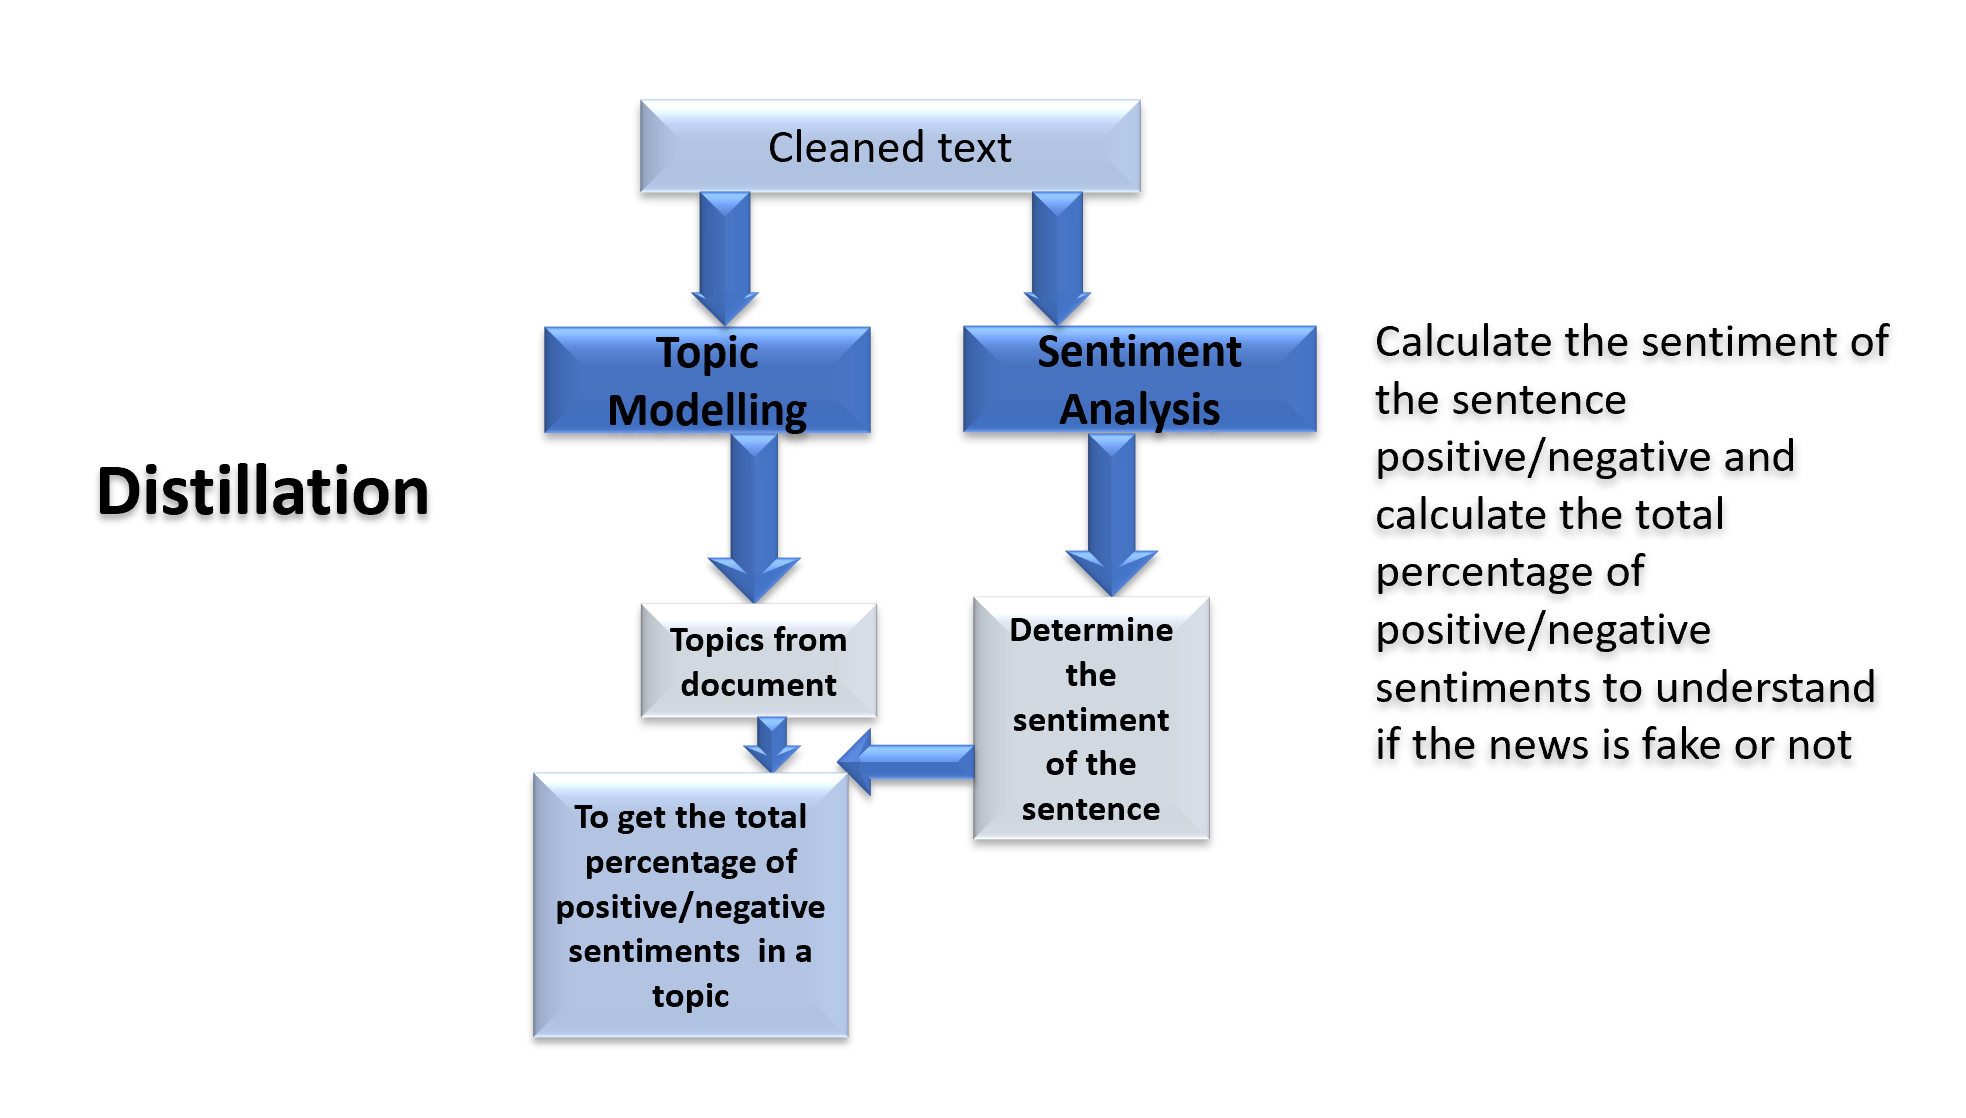

In [249]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.077*"say" + 0.035*"state" + 0.026*"year" + 0.020*"percent" + 0.015*"obama" + 0.010*"unit" + 0.009*"presid" + 0.009*"feder" + 0.009*"job" + 0.009*"peopl"
Topic: 1 
Words: 0.020*"say" + 0.017*"go" + 0.017*"presid" + 0.015*"percent" + 0.014*"peopl" + 0.014*"obama" + 0.013*"plan" + 0.013*"bush" + 0.012*"middl" + 0.012*"american"
Topic: 2 
Words: 0.036*"say" + 0.036*"obama" + 0.029*"presid" + 0.015*"fund" + 0.013*"clinton" + 0.012*"barack" + 0.011*"vote" + 0.011*"billion" + 0.011*"medicar" + 0.011*"hillari"
Topic: 3 
Words: 0.036*"percent" + 0.027*"say" + 0.023*"year" + 0.021*"state" + 0.018*"citi" + 0.012*"billion" + 0.012*"nation" + 0.011*"island" + 0.010*"fund" + 0.010*"rhode"
Topic: 4 
Words: 0.029*"health" + 0.026*"say" + 0.023*"care" + 0.016*"year" + 0.015*"secur" + 0.013*"plan" + 0.013*"social" + 0.012*"illeg" + 0.012*"obama" + 0.012*"go"
Topic: 5 
Words: 0.041*"say" + 0.035*"state" + 0.029*"vote" + 0.012*"texa" + 0.011*"republican" + 0.010*"feder" + 0.010*"chang" 

In [250]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [251]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

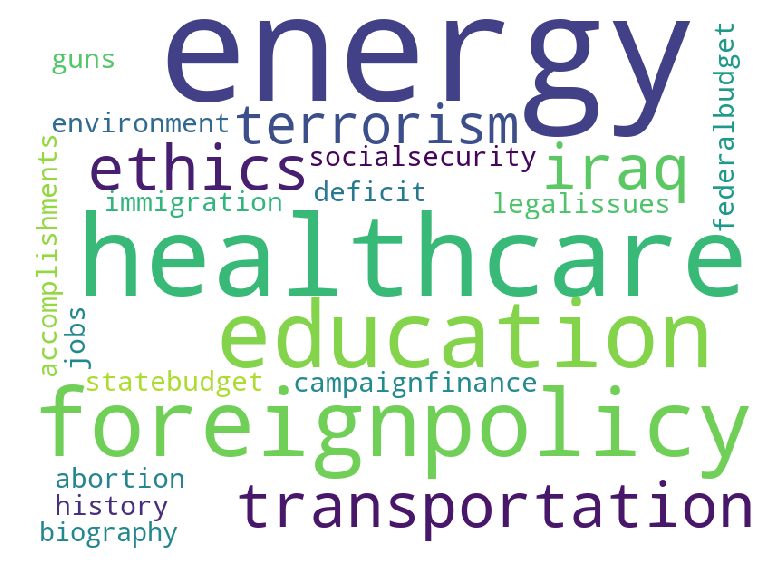

In [253]:
cloud(' '.join(data_subjects['subject']))

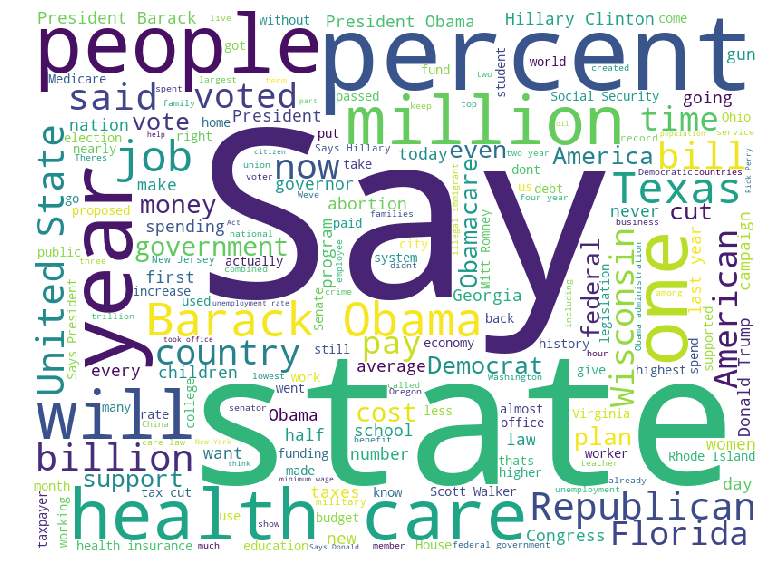

In [255]:
cloud(' '.join(data_train['statement']))

### Topic Names
0. healthcare
1. education
2. foreign-poilicy
3. energy
4. terrorism
5. ethics
6. federal-budget
7. state-budget
8. transportation 
9. candidate-biography

### Predicting a topic from the test data 

In [257]:

num = 100
unseen_document = data_test.statement[num]
print(unseen_document)

Putting three Republicans in my Cabinet...is unprecedented.


In [258]:
# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 10)))

Score: 0.6999660730361938	 Topic: 0.041*"say" + 0.035*"state" + 0.029*"vote" + 0.012*"texa" + 0.011*"republican" + 0.010*"feder" + 0.010*"chang" + 0.009*"elect" + 0.009*"billion" + 0.009*"spend"
Score: 0.033341601490974426	 Topic: 0.029*"health" + 0.026*"say" + 0.023*"care" + 0.016*"year" + 0.015*"secur" + 0.013*"plan" + 0.013*"social" + 0.012*"illeg" + 0.012*"obama" + 0.012*"go"
Score: 0.033340755850076675	 Topic: 0.030*"say" + 0.024*"obama" + 0.020*"presid" + 0.015*"health" + 0.015*"american" + 0.014*"insur" + 0.013*"state" + 0.012*"barack" + 0.012*"nation" + 0.012*"school"
Score: 0.033339887857437134	 Topic: 0.036*"percent" + 0.027*"say" + 0.023*"year" + 0.021*"state" + 0.018*"citi" + 0.012*"billion" + 0.012*"nation" + 0.011*"island" + 0.010*"fund" + 0.010*"rhode"
Score: 0.03333748131990433	 Topic: 0.039*"percent" + 0.032*"year" + 0.028*"state" + 0.018*"job" + 0.017*"scott" + 0.016*"million" + 0.015*"say" + 0.014*"vote" + 0.012*"democrat" + 0.012*"peopl"
Score: 0.033335935324430466	

In [259]:
print(data_test.statement[num])

Putting three Republicans in my Cabinet...is unprecedented.


### Gensim offers a simple way of performing similarity queries using topic models.

In [260]:
from gensim import similarities

lda_index = similarities.MatrixSimilarity(lda_model[bow_corpus])
 
# Let's perform some queries
similarities = lda_index[lda_model[bow_vector]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])

C:\Users\anuks\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(451, 1.0), (1005, 1.0), (1563, 1.0), (2308, 1.0), (3518, 1.0), (3962, 1.0), (4869, 1.0), (4982, 1.0), (5104, 1.0), (7106, 1.0)]


In [261]:
unseen_document = data_test.statement[0]
print(unseen_document)
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
# Let's perform some queries
similarities = lda_index[lda_model[bow_vector]]
# Sort the similarities
similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
 
# Top most similar documents:
print(similarities[:10])

Building a wall on the U.S.-Mexico border will take literally years.
[(7178, 0.99974847), (9053, 0.999507), (3676, 0.9989288), (1864, 0.99884254), (6510, 0.99823976), (6135, 0.9982166), (7987, 0.99760175), (10193, 0.9971768), (9321, 0.99713254), (6260, 0.996543)]


In [263]:
for idx, topic in lda_model.show_topics(formatted=False, num_words= 30):
     print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))

Topic: 0 
Words: ['say', 'state', 'year', 'percent', 'obama', 'unit', 'presid', 'feder', 'job', 'peopl', 'million', 'barack', 'spend', 'texa', 'tax', 'increas', 'govern', 'support', 'budget', 'offic', 'romney', 'school', 'time', 'trump', 'take', 'mitt', 'propos', 'creat', 'candid', 'public']
Topic: 1 
Words: ['say', 'go', 'presid', 'percent', 'peopl', 'obama', 'plan', 'bush', 'middl', 'american', 'countri', 'incom', 'class', 'famili', 'million', 'money', 'save', 'time', 'busi', 'georg', 'support', 'tax', 'averag', 'work', 'counti', 'make', 'compani', 'washington', 'america', 'school']
Topic: 2 
Words: ['say', 'obama', 'presid', 'fund', 'clinton', 'barack', 'vote', 'billion', 'medicar', 'hillari', 'obamacar', 'work', 'unemploy', 'campaign', 'year', 'rate', 'state', 'dont', 'spend', 'percent', 'increas', 'budget', 'want', 'stimulus', 'pay', 'allow', 'plan', 'countri', 'health', 'world']
Topic: 3 
Words: ['percent', 'say', 'year', 'state', 'citi', 'billion', 'nation', 'island', 'fund', 'r

## 2. Sentiment Analysis 

In [264]:
#AFINN is a list of English words rated for valence with an integer
#between minus five (negative) and plus five (positive). The words have
#been manually labeled by Finn Årup Nielsen in 2009-2011. The file
#is tab-separated.

# Using the AFIN-111 json 

In [265]:
afinn_data = {"abandon":"-2","abandoned":"-2","abandons":"-2","abducted":"-2","abduction":"-2","abductions":"-2","abhor":"-3","abhorred":"-3","abhorrent":"-3","abhors":"-3","abilities":"2","ability":"2","aboard":"1","absentee":"-1","absentees":"-1","absolve":"2","absolved":"2","absolves":"2","absolving":"2","absorbed":"1","abuse":"-3","abused":"-3","abuses":"-3","abusive":"-3","accept":"1","accepted":"1","accepting":"1","accepts":"1","accident":"-2","accidental":"-2","accidentally":"-2","accidents":"-2","accomplish":"2","accomplished":"2","accomplishes":"2","accusation":"-2","accusations":"-2","accuse":"-2","accused":"-2","accuses":"-2","accusing":"-2","ache":"-2","achievable":"1","aching":"-2","acquit":"2","acquits":"2","acquitted":"2","acquitting":"2","acrimonious":"-3","active":"1","adequate":"1","admire":"3","admired":"3","admires":"3","admiring":"3","admit":"-1","admits":"-1","admitted":"-1","admonish":"-2","admonished":"-2","adopt":"1","adopts":"1","adorable":"3","adore":"3","adored":"3","adores":"3","advanced":"1","advantage":"2","advantages":"2","adventure":"2","adventures":"2","adventurous":"2","affected":"-1","affection":"3","affectionate":"3","afflicted":"-1","affronted":"-1","afraid":"-2","aggravate":"-2","aggravated":"-2","aggravates":"-2","aggravating":"-2","aggression":"-2","aggressions":"-2","aggressive":"-2","aghast":"-2","agog":"2","agonise":"-3","agonised":"-3","agonises":"-3","agonising":"-3","agonize":"-3","agonized":"-3","agonizes":"-3","agonizing":"-3","agree":"1","agreeable":"2","agreed":"1","agreement":"1","agrees":"1","alarm":"-2","alarmed":"-2","alarmist":"-2","alarmists":"-2","alas":"-1","alert":"-1","alienation":"-2","alive":"1","allergic":"-2","allow":"1","alone":"-2","amaze":"2","amazed":"2","amazes":"2","amazing":"4","ambitious":"2","ambivalent":"-1","amuse":"3","amused":"3","amusement":"3","amusements":"3","anger":"-3","angers":"-3","angry":"-3","anguish":"-3","anguished":"-3","animosity":"-2","annoy":"-2","annoyance":"-2","annoyed":"-2","annoying":"-2","annoys":"-2","antagonistic":"-2","anti":"-1","anticipation":"1","anxiety":"-2","anxious":"-2","apathetic":"-3","apathy":"-3","apeshit":"-3","apocalyptic":"-2","apologise":"-1","apologised":"-1","apologises":"-1","apologising":"-1","apologize":"-1","apologized":"-1","apologizes":"-1","apologizing":"-1","apology":"-1","appalled":"-2","appalling":"-2","appease":"2","appeased":"2","appeases":"2","appeasing":"2","applaud":"2","applauded":"2","applauding":"2","applauds":"2","applause":"2","appreciate":"2","appreciated":"2","appreciates":"2","appreciating":"2","appreciation":"2","apprehensive":"-2","approval":"2","approved":"2","approves":"2","ardent":"1","arrest":"-2","arrested":"-3","arrests":"-2","arrogant":"-2","ashame":"-2","ashamed":"-2","ass":"-4","assassination":"-3","assassinations":"-3","asset":"2","assets":"2","assfucking":"-4","asshole":"-4","astonished":"2","astound":"3","astounded":"3","astounding":"3","astoundingly":"3","astounds":"3","attack":"-1","attacked":"-1","attacking":"-1","attacks":"-1","attract":"1","attracted":"1","attracting":"2","attraction":"2","attractions":"2","attracts":"1","audacious":"3","authority":"1","avert":"-1","averted":"-1","averts":"-1","avid":"2","avoid":"-1","avoided":"-1","avoids":"-1","await":"-1","awaited":"-1","awaits":"-1","award":"3","awarded":"3","awards":"3","awesome":"4","awful":"-3","awkward":"-2","axe":"-1","axed":"-1","backed":"1","backing":"2","backs":"1","bad":"-3","badass":"-3","badly":"-3","bailout":"-2","bamboozle":"-2","bamboozled":"-2","bamboozles":"-2","ban":"-2","banish":"-1","bankrupt":"-3","bankster":"-3","banned":"-2","bargain":"2","barrier":"-2","bastard":"-5","bastards":"-5","battle":"-1","battles":"-1","beaten":"-2","beatific":"3","beating":"-1","beauties":"3","beautiful":"3","beautifully":"3","beautify":"3","belittle":"-2","belittled":"-2","beloved":"3","benefit":"2","benefits":"2","benefitted":"2","benefitting":"2","bereave":"-2","bereaved":"-2","bereaves":"-2","bereaving":"-2","best":"3","betray":"-3","betrayal":"-3","betrayed":"-3","betraying":"-3","betrays":"-3","better":"2","bias":"-1","biased":"-2","big":"1","bitch":"-5","bitches":"-5","bitter":"-2","bitterly":"-2","bizarre":"-2","blah":"-2","blame":"-2","blamed":"-2","blames":"-2","blaming":"-2","bless":"2","blesses":"2","blessing":"3","blind":"-1","bliss":"3","blissful":"3","blithe":"2","block":"-1","blockbuster":"3","blocked":"-1","blocking":"-1","blocks":"-1","bloody":"-3","blurry":"-2","boastful":"-2","bold":"2","boldly":"2","bomb":"-1","boost":"1","boosted":"1","boosting":"1","boosts":"1","bore":"-2","bored":"-2","boring":"-3","bother":"-2","bothered":"-2","bothers":"-2","bothersome":"-2","boycott":"-2","boycotted":"-2","boycotting":"-2","boycotts":"-2","brainwashing":"-3","brave":"2","breakthrough":"3","breathtaking":"5","bribe":"-3","bright":"1","brightest":"2","brightness":"1","brilliant":"4","brisk":"2","broke":"-1","broken":"-1","brooding":"-2","bullied":"-2","bullshit":"-4","bully":"-2","bullying":"-2","bummer":"-2","buoyant":"2","burden":"-2","burdened":"-2","burdening":"-2","burdens":"-2","calm":"2","calmed":"2","calming":"2","calms":"2","can't stand":"-3","cancel":"-1","cancelled":"-1","cancelling":"-1","cancels":"-1","cancer":"-1","capable":"1","captivated":"3","care":"2","carefree":"1","careful":"2","carefully":"2","careless":"-2","cares":"2","cashing in":"-2","casualty":"-2","catastrophe":"-3","catastrophic":"-4","cautious":"-1","celebrate":"3","celebrated":"3","celebrates":"3","celebrating":"3","censor":"-2","censored":"-2","censors":"-2","certain":"1","chagrin":"-2","chagrined":"-2","challenge":"-1","chance":"2","chances":"2","chaos":"-2","chaotic":"-2","charged":"-3","charges":"-2","charm":"3","charming":"3","charmless":"-3","chastise":"-3","chastised":"-3","chastises":"-3","chastising":"-3","cheat":"-3","cheated":"-3","cheater":"-3","cheaters":"-3","cheats":"-3","cheer":"2","cheered":"2","cheerful":"2","cheering":"2","cheerless":"-2","cheers":"2","cheery":"3","cherish":"2","cherished":"2","cherishes":"2","cherishing":"2","chic":"2","childish":"-2","chilling":"-1","choke":"-2","choked":"-2","chokes":"-2","choking":"-2","clarifies":"2","clarity":"2","clash":"-2","classy":"3","clean":"2","cleaner":"2","clear":"1","cleared":"1","clearly":"1","clears":"1","clever":"2","clouded":"-1","clueless":"-2","cock":"-5","cocksucker":"-5","cocksuckers":"-5","cocky":"-2","coerced":"-2","collapse":"-2","collapsed":"-2","collapses":"-2","collapsing":"-2","collide":"-1","collides":"-1","colliding":"-1","collision":"-2","collisions":"-2","colluding":"-3","combat":"-1","combats":"-1","comedy":"1","comfort":"2","comfortable":"2","comforting":"2","comforts":"2","commend":"2","commended":"2","commit":"1","commitment":"2","commits":"1","committed":"1","committing":"1","compassionate":"2","compelled":"1","competent":"2","competitive":"2","complacent":"-2","complain":"-2","complained":"-2","complains":"-2","comprehensive":"2","conciliate":"2","conciliated":"2","conciliates":"2","conciliating":"2","condemn":"-2","condemnation":"-2","condemned":"-2","condemns":"-2","confidence":"2","confident":"2","conflict":"-2","conflicting":"-2","conflictive":"-2","conflicts":"-2","confuse":"-2","confused":"-2","confusing":"-2","congrats":"2","congratulate":"2","congratulation":"2","congratulations":"2","consent":"2","consents":"2","consolable":"2","conspiracy":"-3","constrained":"-2","contagion":"-2","contagions":"-2","contagious":"-1","contempt":"-2","contemptuous":"-2","contemptuously":"-2","contend":"-1","contender":"-1","contending":"-1","contentious":"-2","contestable":"-2","controversial":"-2","controversially":"-2","convince":"1","convinced":"1","convinces":"1","convivial":"2","cool":"1","cool stuff":"3","cornered":"-2","corpse":"-1","costly":"-2","courage":"2","courageous":"2","courteous":"2","courtesy":"2","cover-up":"-3","coward":"-2","cowardly":"-2","coziness":"2","cramp":"-1","crap":"-3","crash":"-2","crazier":"-2","craziest":"-2","crazy":"-2","creative":"2","crestfallen":"-2","cried":"-2","cries":"-2","crime":"-3","criminal":"-3","criminals":"-3","crisis":"-3","critic":"-2","criticism":"-2","criticize":"-2","criticized":"-2","criticizes":"-2","criticizing":"-2","critics":"-2","cruel":"-3","cruelty":"-3","crush":"-1","crushed":"-2","crushes":"-1","crushing":"-1","cry":"-1","crying":"-2","cunt":"-5","curious":"1","curse":"-1","cut":"-1","cute":"2","cuts":"-1","cutting":"-1","cynic":"-2","cynical":"-2","cynicism":"-2","damage":"-3","damages":"-3","damn":"-4","damned":"-4","damnit":"-4","danger":"-2","daredevil":"2","daring":"2","darkest":"-2","darkness":"-1","dauntless":"2","dead":"-3","deadlock":"-2","deafening":"-1","dear":"2","dearly":"3","death":"-2","debonair":"2","debt":"-2","deceit":"-3","deceitful":"-3","deceive":"-3","deceived":"-3","deceives":"-3","deceiving":"-3","deception":"-3","decisive":"1","dedicated":"2","defeated":"-2","defect":"-3","defects":"-3","defender":"2","defenders":"2","defenseless":"-2","defer":"-1","deferring":"-1","defiant":"-1","deficit":"-2","degrade":"-2","degraded":"-2","degrades":"-2","dehumanize":"-2","dehumanized":"-2","dehumanizes":"-2","dehumanizing":"-2","deject":"-2","dejected":"-2","dejecting":"-2","dejects":"-2","delay":"-1","delayed":"-1","delight":"3","delighted":"3","delighting":"3","delights":"3","demand":"-1","demanded":"-1","demanding":"-1","demands":"-1","demonstration":"-1","demoralized":"-2","denied":"-2","denier":"-2","deniers":"-2","denies":"-2","denounce":"-2","denounces":"-2","deny":"-2","denying":"-2","depressed":"-2","depressing":"-2","derail":"-2","derailed":"-2","derails":"-2","deride":"-2","derided":"-2","derides":"-2","deriding":"-2","derision":"-2","desirable":"2","desire":"1","desired":"2","desirous":"2","despair":"-3","despairing":"-3","despairs":"-3","desperate":"-3","desperately":"-3","despondent":"-3","destroy":"-3","destroyed":"-3","destroying":"-3","destroys":"-3","destruction":"-3","destructive":"-3","detached":"-1","detain":"-2","detained":"-2","detention":"-2","determined":"2","devastate":"-2","devastated":"-2","devastating":"-2","devoted":"3","diamond":"1","dick":"-4","dickhead":"-4","die":"-3","died":"-3","difficult":"-1","diffident":"-2","dilemma":"-1","dipshit":"-3","dire":"-3","direful":"-3","dirt":"-2","dirtier":"-2","dirtiest":"-2","dirty":"-2","disabling":"-1","disadvantage":"-2","disadvantaged":"-2","disappear":"-1","disappeared":"-1","disappears":"-1","disappoint":"-2","disappointed":"-2","disappointing":"-2","disappointment":"-2","disappointments":"-2","disappoints":"-2","disaster":"-2","disasters":"-2","disastrous":"-3","disbelieve":"-2","discard":"-1","discarded":"-1","discarding":"-1","discards":"-1","disconsolate":"-2","disconsolation":"-2","discontented":"-2","discord":"-2","discounted":"-1","discouraged":"-2","discredited":"-2","disdain":"-2","disgrace":"-2","disgraced":"-2","disguise":"-1","disguised":"-1","disguises":"-1","disguising":"-1","disgust":"-3","disgusted":"-3","disgusting":"-3","disheartened":"-2","dishonest":"-2","disillusioned":"-2","disinclined":"-2","disjointed":"-2","dislike":"-2","dismal":"-2","dismayed":"-2","disorder":"-2","disorganized":"-2","disoriented":"-2","disparage":"-2","disparaged":"-2","disparages":"-2","disparaging":"-2","displeased":"-2","dispute":"-2","disputed":"-2","disputes":"-2","disputing":"-2","disqualified":"-2","disquiet":"-2","disregard":"-2","disregarded":"-2","disregarding":"-2","disregards":"-2","disrespect":"-2","disrespected":"-2","disruption":"-2","disruptions":"-2","disruptive":"-2","dissatisfied":"-2","distort":"-2","distorted":"-2","distorting":"-2","distorts":"-2","distract":"-2","distracted":"-2","distraction":"-2","distracts":"-2","distress":"-2","distressed":"-2","distresses":"-2","distressing":"-2","distrust":"-3","distrustful":"-3","disturb":"-2","disturbed":"-2","disturbing":"-2","disturbs":"-2","dithering":"-2","dizzy":"-1","dodging":"-2","dodgy":"-2","does not work":"-3","dolorous":"-2","dont like":"-2","doom":"-2","doomed":"-2","doubt":"-1","doubted":"-1","doubtful":"-1","doubting":"-1","doubts":"-1","douche":"-3","douchebag":"-3","downcast":"-2","downhearted":"-2","downside":"-2","drag":"-1","dragged":"-1","drags":"-1","drained":"-2","dread":"-2","dreaded":"-2","dreadful":"-3","dreading":"-2","dream":"1","dreams":"1","dreary":"-2","droopy":"-2","drop":"-1","drown":"-2","drowned":"-2","drowns":"-2","drunk":"-2","dubious":"-2","dud":"-2","dull":"-2","dumb":"-3","dumbass":"-3","dump":"-1","dumped":"-2","dumps":"-1","dupe":"-2","duped":"-2","dysfunction":"-2","eager":"2","earnest":"2","ease":"2","easy":"1","ecstatic":"4","eerie":"-2","eery":"-2","effective":"2","effectively":"2","elated":"3","elation":"3","elegant":"2","elegantly":"2","embarrass":"-2","embarrassed":"-2","embarrasses":"-2","embarrassing":"-2","embarrassment":"-2","embittered":"-2","embrace":"1","emergency":"-2","empathetic":"2","emptiness":"-1","empty":"-1","enchanted":"2","encourage":"2","encouraged":"2","encouragement":"2","encourages":"2","endorse":"2","endorsed":"2","endorsement":"2","endorses":"2","enemies":"-2","enemy":"-2","energetic":"2","engage":"1","engages":"1","engrossed":"1","enjoy":"2","enjoying":"2","enjoys":"2","enlighten":"2","enlightened":"2","enlightening":"2","enlightens":"2","ennui":"-2","enrage":"-2","enraged":"-2","enrages":"-2","enraging":"-2","enrapture":"3","enslave":"-2","enslaved":"-2","enslaves":"-2","ensure":"1","ensuring":"1","enterprising":"1","entertaining":"2","enthral":"3","enthusiastic":"3","entitled":"1","entrusted":"2","envies":"-1","envious":"-2","envy":"-1","envying":"-1","erroneous":"-2","error":"-2","errors":"-2","escape":"-1","escapes":"-1","escaping":"-1","esteemed":"2","ethical":"2","euphoria":"3","euphoric":"4","eviction":"-1","evil":"-3","exaggerate":"-2","exaggerated":"-2","exaggerates":"-2","exaggerating":"-2","exasperated":"2","excellence":"3","excellent":"3","excite":"3","excited":"3","excitement":"3","exciting":"3","exclude":"-1","excluded":"-2","exclusion":"-1","exclusive":"2","excuse":"-1","exempt":"-1","exhausted":"-2","exhilarated":"3","exhilarates":"3","exhilarating":"3","exonerate":"2","exonerated":"2","exonerates":"2","exonerating":"2","expand":"1","expands":"1","expel":"-2","expelled":"-2","expelling":"-2","expels":"-2","exploit":"-2","exploited":"-2","exploiting":"-2","exploits":"-2","exploration":"1","explorations":"1","expose":"-1","exposed":"-1","exposes":"-1","exposing":"-1","extend":"1","extends":"1","exuberant":"4","exultant":"3","exultantly":"3","fabulous":"4","fad":"-2","fag":"-3","faggot":"-3","faggots":"-3","fail":"-2","failed":"-2","failing":"-2","fails":"-2","failure":"-2","failures":"-2","fainthearted":"-2","fair":"2","faith":"1","faithful":"3","fake":"-3","fakes":"-3","faking":"-3","fallen":"-2","falling":"-1","falsified":"-3","falsify":"-3","fame":"1","fan":"3","fantastic":"4","farce":"-1","fascinate":"3","fascinated":"3","fascinates":"3","fascinating":"3","fascist":"-2","fascists":"-2","fatalities":"-3","fatality":"-3","fatigue":"-2","fatigued":"-2","fatigues":"-2","fatiguing":"-2","favor":"2","favored":"2","favorite":"2","favorited":"2","favorites":"2","favors":"2","fear":"-2","fearful":"-2","fearing":"-2","fearless":"2","fearsome":"-2","fed up":"-3","feeble":"-2","feeling":"1","felonies":"-3","felony":"-3","fervent":"2","fervid":"2","festive":"2","fiasco":"-3","fidgety":"-2","fight":"-1","fine":"2","fire":"-2","fired":"-2","firing":"-2","fit":"1","fitness":"1","flagship":"2","flees":"-1","flop":"-2","flops":"-2","flu":"-2","flustered":"-2","focused":"2","fond":"2","fondness":"2","fool":"-2","foolish":"-2","fools":"-2","forced":"-1","foreclosure":"-2","foreclosures":"-2","forget":"-1","forgetful":"-2","forgive":"1","forgiving":"1","forgotten":"-1","fortunate":"2","frantic":"-1","fraud":"-4","frauds":"-4","fraudster":"-4","fraudsters":"-4","fraudulence":"-4","fraudulent":"-4","free":"1","freedom":"2","frenzy":"-3","fresh":"1","friendly":"2","fright":"-2","frightened":"-2","frightening":"-3","frikin":"-2","frisky":"2","frowning":"-1","frustrate":"-2","frustrated":"-2","frustrates":"-2","frustrating":"-2","frustration":"-2","ftw":"3","fuck":"-4","fucked":"-4","fucker":"-4","fuckers":"-4","fuckface":"-4","fuckhead":"-4","fucking":"-4","fucktard":"-4","fud":"-3","fuked":"-4","fuking":"-4","fulfill":"2","fulfilled":"2","fulfills":"2","fuming":"-2","fun":"4","funeral":"-1","funerals":"-1","funky":"2","funnier":"4","funny":"4","furious":"-3","futile":"2","gag":"-2","gagged":"-2","gain":"2","gained":"2","gaining":"2","gains":"2","gallant":"3","gallantly":"3","gallantry":"3","generous":"2","genial":"3","ghost":"-1","giddy":"-2","gift":"2","glad":"3","glamorous":"3","glamourous":"3","glee":"3","gleeful":"3","gloom":"-1","gloomy":"-2","glorious":"2","glory":"2","glum":"-2","god":"1","goddamn":"-3","godsend":"4","good":"3","goodness":"3","grace":"1","gracious":"3","grand":"3","grant":"1","granted":"1","granting":"1","grants":"1","grateful":"3","gratification":"2","grave":"-2","gray":"-1","great":"3","greater":"3","greatest":"3","greed":"-3","greedy":"-2","green wash":"-3","green washing":"-3","greenwash":"-3","greenwasher":"-3","greenwashers":"-3","greenwashing":"-3","greet":"1","greeted":"1","greeting":"1","greetings":"2","greets":"1","grey":"-1","grief":"-2","grieved":"-2","gross":"-2","growing":"1","growth":"2","guarantee":"1","guilt":"-3","guilty":"-3","gullibility":"-2","gullible":"-2","gun":"-1","ha":"2","hacked":"-1","haha":"3","hahaha":"3","hahahah":"3","hail":"2","hailed":"2","hapless":"-2","haplessness":"-2","happiness":"3","happy":"3","hard":"-1","hardier":"2","hardship":"-2","hardy":"2","harm":"-2","harmed":"-2","harmful":"-2","harming":"-2","harms":"-2","harried":"-2","harsh":"-2","harsher":"-2","harshest":"-2","hate":"-3","hated":"-3","haters":"-3","hates":"-3","hating":"-3","haunt":"-1","haunted":"-2","haunting":"1","haunts":"-1","havoc":"-2","healthy":"2","heartbreaking":"-3","heartbroken":"-3","heartfelt":"3","heaven":"2","heavenly":"4","heavyhearted":"-2","hell":"-4","help":"2","helpful":"2","helping":"2","helpless":"-2","helps":"2","hero":"2","heroes":"2","heroic":"3","hesitant":"-2","hesitate":"-2","hid":"-1","hide":"-1","hides":"-1","hiding":"-1","highlight":"2","hilarious":"2","hindrance":"-2","hoax":"-2","homesick":"-2","honest":"2","honor":"2","honored":"2","honoring":"2","honour":"2","honoured":"2","honouring":"2","hooligan":"-2","hooliganism":"-2","hooligans":"-2","hope":"2","hopeful":"2","hopefully":"2","hopeless":"-2","hopelessness":"-2","hopes":"2","hoping":"2","horrendous":"-3","horrible":"-3","horrific":"-3","horrified":"-3","hostile":"-2","huckster":"-2","hug":"2","huge":"1","hugs":"2","humerous":"3","humiliated":"-3","humiliation":"-3","humor":"2","humorous":"2","humour":"2","humourous":"2","hunger":"-2","hurrah":"5","hurt":"-2","hurting":"-2","hurts":"-2","hypocritical":"-2","hysteria":"-3","hysterical":"-3","hysterics":"-3","idiot":"-3","idiotic":"-3","ignorance":"-2","ignorant":"-2","ignore":"-1","ignored":"-2","ignores":"-1","ill":"-2","illegal":"-3","illiteracy":"-2","illness":"-2","illnesses":"-2","imbecile":"-3","immobilized":"-1","immortal":"2","immune":"1","impatient":"-2","imperfect":"-2","importance":"2","important":"2","impose":"-1","imposed":"-1","imposes":"-1","imposing":"-1","impotent":"-2","impress":"3","impressed":"3","impresses":"3","impressive":"3","imprisoned":"-2","improve":"2","improved":"2","improvement":"2","improves":"2","improving":"2","inability":"-2","inaction":"-2","inadequate":"-2","incapable":"-2","incapacitated":"-2","incensed":"-2","incompetence":"-2","incompetent":"-2","inconsiderate":"-2","inconvenience":"-2","inconvenient":"-2","increase":"1","increased":"1","indecisive":"-2","indestructible":"2","indifference":"-2","indifferent":"-2","indignant":"-2","indignation":"-2","indoctrinate":"-2","indoctrinated":"-2","indoctrinates":"-2","indoctrinating":"-2","ineffective":"-2","ineffectively":"-2","infatuated":"2","infatuation":"2","infected":"-2","inferior":"-2","inflamed":"-2","influential":"2","infringement":"-2","infuriate":"-2","infuriated":"-2","infuriates":"-2","infuriating":"-2","inhibit":"-1","injured":"-2","injury":"-2","injustice":"-2","innovate":"1","innovates":"1","innovation":"1","innovative":"2","inquisition":"-2","inquisitive":"2","insane":"-2","insanity":"-2","insecure":"-2","insensitive":"-2","insensitivity":"-2","insignificant":"-2","insipid":"-2","inspiration":"2","inspirational":"2","inspire":"2","inspired":"2","inspires":"2","inspiring":"3","insult":"-2","insulted":"-2","insulting":"-2","insults":"-2","intact":"2","integrity":"2","intelligent":"2","intense":"1","interest":"1","interested":"2","interesting":"2","interests":"1","interrogated":"-2","interrupt":"-2","interrupted":"-2","interrupting":"-2","interruption":"-2","interrupts":"-2","intimidate":"-2","intimidated":"-2","intimidates":"-2","intimidating":"-2","intimidation":"-2","intricate":"2","intrigues":"1","invincible":"2","invite":"1","inviting":"1","invulnerable":"2","irate":"-3","ironic":"-1","irony":"-1","irrational":"-1","irresistible":"2","irresolute":"-2","irresponsible":"2","irreversible":"-1","irritate":"-3","irritated":"-3","irritating":"-3","isolated":"-1","itchy":"-2","jackass":"-4","jackasses":"-4","jailed":"-2","jaunty":"2","jealous":"-2","jeopardy":"-2","jerk":"-3","jesus":"1","jewel":"1","jewels":"1","jocular":"2","join":"1","joke":"2","jokes":"2","jolly":"2","jovial":"2","joy":"3","joyful":"3","joyfully":"3","joyless":"-2","joyous":"3","jubilant":"3","jumpy":"-1","justice":"2","justifiably":"2","justified":"2","keen":"1","kill":"-3","killed":"-3","killing":"-3","kills":"-3","kind":"2","kinder":"2","kiss":"2","kudos":"3","lack":"-2","lackadaisical":"-2","lag":"-1","lagged":"-2","lagging":"-2","lags":"-2","lame":"-2","landmark":"2","laugh":"1","laughed":"1","laughing":"1","laughs":"1","laughting":"1","launched":"1","lawl":"3","lawsuit":"-2","lawsuits":"-2","lazy":"-1","leak":"-1","leaked":"-1","leave":"-1","legal":"1","legally":"1","lenient":"1","lethargic":"-2","lethargy":"-2","liar":"-3","liars":"-3","libelous":"-2","lied":"-2","lifesaver":"4","lighthearted":"1","like":"2","liked":"2","likes":"2","limitation":"-1","limited":"-1","limits":"-1","litigation":"-1","litigious":"-2","lively":"2","livid":"-2","lmao":"4","lmfao":"4","loathe":"-3","loathed":"-3","loathes":"-3","loathing":"-3","lobby":"-2","lobbying":"-2","lol":"3","lonely":"-2","lonesome":"-2","longing":"-1","loom":"-1","loomed":"-1","looming":"-1","looms":"-1","loose":"-3","looses":"-3","loser":"-3","losing":"-3","loss":"-3","lost":"-3","lovable":"3","love":"3","loved":"3","lovelies":"3","lovely":"3","loving":"2","lowest":"-1","loyal":"3","loyalty":"3","luck":"3","luckily":"3","lucky":"3","lugubrious":"-2","lunatic":"-3","lunatics":"-3","lurk":"-1","lurking":"-1","lurks":"-1","mad":"-3","maddening":"-3","made-up":"-1","madly":"-3","madness":"-3","mandatory":"-1","manipulated":"-1","manipulating":"-1","manipulation":"-1","marvel":"3","marvelous":"3","marvels":"3","masterpiece":"4","masterpieces":"4","matter":"1","matters":"1","mature":"2","meaningful":"2","meaningless":"-2","medal":"3","mediocrity":"-3","meditative":"1","melancholy":"-2","menace":"-2","menaced":"-2","mercy":"2","merry":"3","mess":"-2","messed":"-2","messing up":"-2","methodical":"2","mindless":"-2","miracle":"4","mirth":"3","mirthful":"3","mirthfully":"3","misbehave":"-2","misbehaved":"-2","misbehaves":"-2","misbehaving":"-2","mischief":"-1","mischiefs":"-1","miserable":"-3","misery":"-2","misgiving":"-2","misinformation":"-2","misinformed":"-2","misinterpreted":"-2","misleading":"-3","misread":"-1","misreporting":"-2","misrepresentation":"-2","miss":"-2","missed":"-2","missing":"-2","mistake":"-2","mistaken":"-2","mistakes":"-2","mistaking":"-2","misunderstand":"-2","misunderstanding":"-2","misunderstands":"-2","misunderstood":"-2","moan":"-2","moaned":"-2","moaning":"-2","moans":"-2","mock":"-2","mocked":"-2","mocking":"-2","mocks":"-2","mongering":"-2","monopolize":"-2","monopolized":"-2","monopolizes":"-2","monopolizing":"-2","moody":"-1","mope":"-1","moping":"-1","moron":"-3","motherfucker":"-5","motherfucking":"-5","motivate":"1","motivated":"2","motivating":"2","motivation":"1","mourn":"-2","mourned":"-2","mournful":"-2","mourning":"-2","mourns":"-2","mumpish":"-2","murder":"-2","murderer":"-2","murdering":"-3","murderous":"-3","murders":"-2","myth":"-1","n00b":"-2","naive":"-2","nasty":"-3","natural":"1","naïve":"-2","needy":"-2","negative":"-2","negativity":"-2","neglect":"-2","neglected":"-2","neglecting":"-2","neglects":"-2","nerves":"-1","nervous":"-2","nervously":"-2","nice":"3","nifty":"2","niggas":"-5","nigger":"-5","no":"-1","no fun":"-3","noble":"2","noisy":"-1","nonsense":"-2","noob":"-2","nosey":"-2","not good":"-2","not working":"-3","notorious":"-2","novel":"2","numb":"-1","nuts":"-3","obliterate":"-2","obliterated":"-2","obnoxious":"-3","obscene":"-2","obsessed":"2","obsolete":"-2","obstacle":"-2","obstacles":"-2","obstinate":"-2","odd":"-2","offend":"-2","offended":"-2","offender":"-2","offending":"-2","offends":"-2","offline":"-1","oks":"2","ominous":"3","once-in-a-lifetime":"3","opportunities":"2","opportunity":"2","oppressed":"-2","oppressive":"-2","optimism":"2","optimistic":"2","optionless":"-2","outcry":"-2","outmaneuvered":"-2","outrage":"-3","outraged":"-3","outreach":"2","outstanding":"5","overjoyed":"4","overload":"-1","overlooked":"-1","overreact":"-2","overreacted":"-2","overreaction":"-2","overreacts":"-2","oversell":"-2","overselling":"-2","oversells":"-2","oversimplification":"-2","oversimplified":"-2","oversimplifies":"-2","oversimplify":"-2","overstatement":"-2","overstatements":"-2","overweight":"-1","oxymoron":"-1","pain":"-2","pained":"-2","panic":"-3","panicked":"-3","panics":"-3","paradise":"3","paradox":"-1","pardon":"2","pardoned":"2","pardoning":"2","pardons":"2","parley":"-1","passionate":"2","passive":"-1","passively":"-1","pathetic":"-2","pay":"-1","peace":"2","peaceful":"2","peacefully":"2","penalty":"-2","pensive":"-1","perfect":"3","perfected":"2","perfectly":"3","perfects":"2","peril":"-2","perjury":"-3","perpetrator":"-2","perpetrators":"-2","perplexed":"-2","persecute":"-2","persecuted":"-2","persecutes":"-2","persecuting":"-2","perturbed":"-2","pesky":"-2","pessimism":"-2","pessimistic":"-2","petrified":"-2","phobic":"-2","picturesque":"2","pileup":"-1","pique":"-2","piqued":"-2","piss":"-4","pissed":"-4","pissing":"-3","piteous":"-2","pitied":"-1","pity":"-2","playful":"2","pleasant":"3","please":"1","pleased":"3","pleasure":"3","poised":"-2","poison":"-2","poisoned":"-2","poisons":"-2","pollute":"-2","polluted":"-2","polluter":"-2","polluters":"-2","pollutes":"-2","poor":"-2","poorer":"-2","poorest":"-2","popular":"3","positive":"2","positively":"2","possessive":"-2","postpone":"-1","postponed":"-1","postpones":"-1","postponing":"-1","poverty":"-1","powerful":"2","powerless":"-2","praise":"3","praised":"3","praises":"3","praising":"3","pray":"1","praying":"1","prays":"1","prblm":"-2","prblms":"-2","prepared":"1","pressure":"-1","pressured":"-2","pretend":"-1","pretending":"-1","pretends":"-1","pretty":"1","prevent":"-1","prevented":"-1","preventing":"-1","prevents":"-1","prick":"-5","prison":"-2","prisoner":"-2","prisoners":"-2","privileged":"2","proactive":"2","problem":"-2","problems":"-2","profiteer":"-2","progress":"2","prominent":"2","promise":"1","promised":"1","promises":"1","promote":"1","promoted":"1","promotes":"1","promoting":"1","propaganda":"-2","prosecute":"-1","prosecuted":"-2","prosecutes":"-1","prosecution":"-1","prospect":"1","prospects":"1","prosperous":"3","protect":"1","protected":"1","protects":"1","protest":"-2","protesters":"-2","protesting":"-2","protests":"-2","proud":"2","proudly":"2","provoke":"-1","provoked":"-1","provokes":"-1","provoking":"-1","pseudoscience":"-3","punish":"-2","punished":"-2","punishes":"-2","punitive":"-2","pushy":"-1","puzzled":"-2","quaking":"-2","questionable":"-2","questioned":"-1","questioning":"-1","racism":"-3","racist":"-3","racists":"-3","rage":"-2","rageful":"-2","rainy":"-1","rant":"-3","ranter":"-3","ranters":"-3","rants":"-3","rape":"-4","rapist":"-4","rapture":"2","raptured":"2","raptures":"2","rapturous":"4","rash":"-2","ratified":"2","reach":"1","reached":"1","reaches":"1","reaching":"1","reassure":"1","reassured":"1","reassures":"1","reassuring":"2","rebellion":"-2","recession":"-2","reckless":"-2","recommend":"2","recommended":"2","recommends":"2","redeemed":"2","refuse":"-2","refused":"-2","refusing":"-2","regret":"-2","regretful":"-2","regrets":"-2","regretted":"-2","regretting":"-2","reject":"-1","rejected":"-1","rejecting":"-1","rejects":"-1","rejoice":"4","rejoiced":"4","rejoices":"4","rejoicing":"4","relaxed":"2","relentless":"-1","reliant":"2","relieve":"1","relieved":"2","relieves":"1","relieving":"2","relishing":"2","remarkable":"2","remorse":"-2","repulse":"-1","repulsed":"-2","rescue":"2","rescued":"2","rescues":"2","resentful":"-2","resign":"-1","resigned":"-1","resigning":"-1","resigns":"-1","resolute":"2","resolve":"2","resolved":"2","resolves":"2","resolving":"2","respected":"2","responsible":"2","responsive":"2","restful":"2","restless":"-2","restore":"1","restored":"1","restores":"1","restoring":"1","restrict":"-2","restricted":"-2","restricting":"-2","restriction":"-2","restricts":"-2","retained":"-1","retard":"-2","retarded":"-2","retreat":"-1","revenge":"-2","revengeful":"-2","revered":"2","revive":"2","revives":"2","reward":"2","rewarded":"2","rewarding":"2","rewards":"2","rich":"2","ridiculous":"-3","rig":"-1","rigged":"-1","right direction":"3","rigorous":"3","rigorously":"3","riot":"-2","riots":"-2","risk":"-2","risks":"-2","rob":"-2","robber":"-2","robed":"-2","robing":"-2","robs":"-2","robust":"2","rofl":"4","roflcopter":"4","roflmao":"4","romance":"2","rotfl":"4","rotflmfao":"4","rotflol":"4","ruin":"-2","ruined":"-2","ruining":"-2","ruins":"-2","sabotage":"-2","sad":"-2","sadden":"-2","saddened":"-2","sadly":"-2","safe":"1","safely":"1","safety":"1","salient":"1","sappy":"-1","sarcastic":"-2","satisfied":"2","save":"2","saved":"2","scam":"-2","scams":"-2","scandal":"-3","scandalous":"-3","scandals":"-3","scapegoat":"-2","scapegoats":"-2","scare":"-2","scared":"-2","scary":"-2","sceptical":"-2","scold":"-2","scoop":"3","scorn":"-2","scornful":"-2","scream":"-2","screamed":"-2","screaming":"-2","screams":"-2","screwed":"-2","screwed up":"-3","scumbag":"-4","secure":"2","secured":"2","secures":"2","sedition":"-2","seditious":"-2","seduced":"-1","self-confident":"2","self-deluded":"-2","selfish":"-3","selfishness":"-3","sentence":"-2","sentenced":"-2","sentences":"-2","sentencing":"-2","serene":"2","severe":"-2","sexy":"3","shaky":"-2","shame":"-2","shamed":"-2","shameful":"-2","share":"1","shared":"1","shares":"1","shattered":"-2","shit":"-4","shithead":"-4","shitty":"-3","shock":"-2","shocked":"-2","shocking":"-2","shocks":"-2","shoot":"-1","short-sighted":"-2","short-sightedness":"-2","shortage":"-2","shortages":"-2","shrew":"-4","shy":"-1","sick":"-2","sigh":"-2","significance":"1","significant":"1","silencing":"-1","silly":"-1","sincere":"2","sincerely":"2","sincerest":"2","sincerity":"2","sinful":"-3","singleminded":"-2","skeptic":"-2","skeptical":"-2","skepticism":"-2","skeptics":"-2","slam":"-2","slash":"-2","slashed":"-2","slashes":"-2","slashing":"-2","slavery":"-3","sleeplessness":"-2","slick":"2","slicker":"2","slickest":"2","sluggish":"-2","slut":"-5","smart":"1","smarter":"2","smartest":"2","smear":"-2","smile":"2","smiled":"2","smiles":"2","smiling":"2","smog":"-2","sneaky":"-1","snub":"-2","snubbed":"-2","snubbing":"-2","snubs":"-2","sobering":"1","solemn":"-1","solid":"2","solidarity":"2","solution":"1","solutions":"1","solve":"1","solved":"1","solves":"1","solving":"1","somber":"-2","some kind":"0","son-of-a-bitch":"-5","soothe":"3","soothed":"3","soothing":"3","sophisticated":"2","sore":"-1","sorrow":"-2","sorrowful":"-2","sorry":"-1","spam":"-2","spammer":"-3","spammers":"-3","spamming":"-2","spark":"1","sparkle":"3","sparkles":"3","sparkling":"3","speculative":"-2","spirit":"1","spirited":"2","spiritless":"-2","spiteful":"-2","splendid":"3","sprightly":"2","squelched":"-1","stab":"-2","stabbed":"-2","stable":"2","stabs":"-2","stall":"-2","stalled":"-2","stalling":"-2","stamina":"2","stampede":"-2","startled":"-2","starve":"-2","starved":"-2","starves":"-2","starving":"-2","steadfast":"2","steal":"-2","steals":"-2","stereotype":"-2","stereotyped":"-2","stifled":"-1","stimulate":"1","stimulated":"1","stimulates":"1","stimulating":"2","stingy":"-2","stolen":"-2","stop":"-1","stopped":"-1","stopping":"-1","stops":"-1","stout":"2","straight":"1","strange":"-1","strangely":"-1","strangled":"-2","strength":"2","strengthen":"2","strengthened":"2","strengthening":"2","strengthens":"2","stressed":"-2","stressor":"-2","stressors":"-2","stricken":"-2","strike":"-1","strikers":"-2","strikes":"-1","strong":"2","stronger":"2","strongest":"2","struck":"-1","struggle":"-2","struggled":"-2","struggles":"-2","struggling":"-2","stubborn":"-2","stuck":"-2","stunned":"-2","stunning":"4","stupid":"-2","stupidly":"-2","suave":"2","substantial":"1","substantially":"1","subversive":"-2","success":"2","successful":"3","suck":"-3","sucks":"-3","suffer":"-2","suffering":"-2","suffers":"-2","suicidal":"-2","suicide":"-2","suing":"-2","sulking":"-2","sulky":"-2","sullen":"-2","sunshine":"2","super":"3","superb":"5","superior":"2","support":"2","supported":"2","supporter":"1","supporters":"1","supporting":"1","supportive":"2","supports":"2","survived":"2","surviving":"2","survivor":"2","suspect":"-1","suspected":"-1","suspecting":"-1","suspects":"-1","suspend":"-1","suspended":"-1","suspicious":"-2","swear":"-2","swearing":"-2","swears":"-2","sweet":"2","swift":"2","swiftly":"2","swindle":"-3","swindles":"-3","swindling":"-3","sympathetic":"2","sympathy":"2","tard":"-2","tears":"-2","tender":"2","tense":"-2","tension":"-1","terrible":"-3","terribly":"-3","terrific":"4","terrified":"-3","terror":"-3","terrorize":"-3","terrorized":"-3","terrorizes":"-3","thank":"2","thankful":"2","thanks":"2","thorny":"-2","thoughtful":"2","thoughtless":"-2","threat":"-2","threaten":"-2","threatened":"-2","threatening":"-2","threatens":"-2","threats":"-2","thrilled":"5","thwart":"-2","thwarted":"-2","thwarting":"-2","thwarts":"-2","timid":"-2","timorous":"-2","tired":"-2","tits":"-2","tolerant":"2","toothless":"-2","top":"2","tops":"2","torn":"-2","torture":"-4","tortured":"-4","tortures":"-4","torturing":"-4","totalitarian":"-2","totalitarianism":"-2","tout":"-2","touted":"-2","touting":"-2","touts":"-2","tragedy":"-2","tragic":"-2","tranquil":"2","trap":"-1","trapped":"-2","trauma":"-3","traumatic":"-3","travesty":"-2","treason":"-3","treasonous":"-3","treasure":"2","treasures":"2","trembling":"-2","tremulous":"-2","tricked":"-2","trickery":"-2","triumph":"4","triumphant":"4","trouble":"-2","troubled":"-2","troubles":"-2","true":"2","trust":"1","trusted":"2","tumor":"-2","twat":"-5","ugly":"-3","unacceptable":"-2","unappreciated":"-2","unapproved":"-2","unaware":"-2","unbelievable":"-1","unbelieving":"-1","unbiased":"2","uncertain":"-1","unclear":"-1","uncomfortable":"-2","unconcerned":"-2","unconfirmed":"-1","unconvinced":"-1","uncredited":"-1","undecided":"-1","underestimate":"-1","underestimated":"-1","underestimates":"-1","underestimating":"-1","undermine":"-2","undermined":"-2","undermines":"-2","undermining":"-2","undeserving":"-2","undesirable":"-2","uneasy":"-2","unemployment":"-2","unequal":"-1","unequaled":"2","unethical":"-2","unfair":"-2","unfocused":"-2","unfulfilled":"-2","unhappy":"-2","unhealthy":"-2","unified":"1","unimpressed":"-2","unintelligent":"-2","united":"1","unjust":"-2","unlovable":"-2","unloved":"-2","unmatched":"1","unmotivated":"-2","unprofessional":"-2","unresearched":"-2","unsatisfied":"-2","unsecured":"-2","unsettled":"-1","unsophisticated":"-2","unstable":"-2","unstoppable":"2","unsupported":"-2","unsure":"-1","untarnished":"2","unwanted":"-2","unworthy":"-2","upset":"-2","upsets":"-2","upsetting":"-2","uptight":"-2","urgent":"-1","useful":"2","usefulness":"2","useless":"-2","uselessness":"-2","vague":"-2","validate":"1","validated":"1","validates":"1","validating":"1","verdict":"-1","verdicts":"-1","vested":"1","vexation":"-2","vexing":"-2","vibrant":"3","vicious":"-2","victim":"-3","victimize":"-3","victimized":"-3","victimizes":"-3","victimizing":"-3","victims":"-3","vigilant":"3","vile":"-3","vindicate":"2","vindicated":"2","vindicates":"2","vindicating":"2","violate":"-2","violated":"-2","violates":"-2","violating":"-2","violence":"-3","violent":"-3","virtuous":"2","virulent":"-2","vision":"1","visionary":"3","visioning":"1","visions":"1","vitality":"3","vitamin":"1","vitriolic":"-3","vivacious":"3","vociferous":"-1","vulnerability":"-2","vulnerable":"-2","walkout":"-2","walkouts":"-2","wanker":"-3","want":"1","war":"-2","warfare":"-2","warm":"1","warmth":"2","warn":"-2","warned":"-2","warning":"-3","warnings":"-3","warns":"-2","waste":"-1","wasted":"-2","wasting":"-2","wavering":"-1","weak":"-2","weakness":"-2","wealth":"3","wealthy":"2","weary":"-2","weep":"-2","weeping":"-2","weird":"-2","welcome":"2","welcomed":"2","welcomes":"2","whimsical":"1","whitewash":"-3","whore":"-4","wicked":"-2","widowed":"-1","willingness":"2","win":"4","winner":"4","winning":"4","wins":"4","winwin":"3","wish":"1","wishes":"1","wishing":"1","withdrawal":"-3","woebegone":"-2","woeful":"-3","won":"3","wonderful":"4","woo":"3","woohoo":"3","wooo":"4","woow":"4","worn":"-1","worried":"-3","worry":"-3","worrying":"-3","worse":"-3","worsen":"-3","worsened":"-3","worsening":"-3","worsens":"-3","worshiped":"3","worst":"-3","worth":"2","worthless":"-2","worthy":"2","wow":"4","wowow":"4","wowww":"4","wrathful":"-3","wreck":"-2","wrong":"-2","wronged":"-2","wtf":"-4","yeah":"1","yearning":"1","yeees":"2","yes":"1","youthful":"2","yucky":"-2","yummy":"3","zealot":"-2","zealots":"-2","zealous":"2"}

In [266]:
score_word_dict = dict(afinn_data)

In [267]:
# Set the score of each word definition.
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [268]:
scores=[]
for d in data_train['statement']:
    score = definition_score(d, score_word_dict)
    #print(score)
    scores.append(score)

In [269]:
# We create a new column 'statement_feeling_score' with score of each definition. 
data_train['statement_feeling_score'] = scores

In [270]:
data_sort_by_feeling = data_train.sort_values(by=['statement_feeling_score'])

### Sentences with the worst sentiments

In [271]:
data_sort_by_feeling[['statement','speaker','party_affiliation','statement_feeling_score']][:15]

,statement,speaker,party_affiliation,statement_feeling_score
9433,The attorney general requires that rape victim...,barbara-ann-radnofsky,democrat,-12
4015,"In the mid 1990s, in our state, (Florida was) ...",charlie-crist,democrat,-12
7380,Chris Koster opposed protecting the women of M...,eric-greitens,republican,-12
9934,"In the 1990s, the Biden Crime Bill added 100,0...",joe-biden,democrat,-11
4934,Prince William County has cut violent crime in...,corey-stewart,republican,-10
8263,Says Catherine Cortez Masto failed Nevada rape...,senate-leadership-fund,republican,-10
7657,More lives have been lost because of the war w...,greg-abbott,republican,-10
2932,"Due to the war in Iraq, 4,400 Americans are de...",ron-paul,republican,-9
2363,More lives are lost from violence against wome...,emma-watson,none,-9
2294,Youre more likely to be the victim of a violen...,van-wanggaard,republican,-9


### Sentences with the best sentiments

In [274]:
data_sort_by_feeling[['statement','speaker','party_affiliation','statement_feeling_score']][-15:]

,statement,speaker,party_affiliation,statement_feeling_score
3752,"Says the health care law rations care, like sy...",rick-scott,republican,7
1538,"Four balanced budgets in a row, with no new ta...",chris-christie,republican,8
3425,Says Texas Senate hopeful Donna Campbell doesn...,burnt-orange-report,democrat,8
6708,"Already, the Affordable Care Act is helping to...",barack-obama,democrat,8
1717,Odds of winning the Monopoly Millionaire insta...,georgia-lottery,none,8
4760,A bag of Cheetos costs less to buy than an app...,mike-tate,democrat,8
5907,The RESTORE Act started as an effort to dedica...,marco-rubio,republican,8
2859,"Four balanced budgets in a row, with no new ta...",chris-christie,republican,8
4431,"Under the health care law, everybody will have...",nancy-pelosi,democrat,8
1120,"Virginia was named best managed state, best st...",tim-kaine,democrat,9


### Pie about numbers of words with mostly true and barely true

In [275]:
#Boolean column if (up>=down): True
data_train['positive_words'] = data_train['mostly_true_counts'] > data_train['barely_true_counts']
data_train[['label','mostly_true_counts','barely_true_counts','context','speaker']].head()

,label,mostly_true_counts,barely_true_counts,context,speaker
0,FALSE,0.0,0.0,a mailer,dwayne-bohac
1,half-true,1.0,0.0,a floor speech.,scott-surovell
2,mostly-true,163.0,70.0,Denver,barack-obama
3,FALSE,5.0,7.0,a news release,blog-posting
4,half-true,19.0,15.0,an interview on CNN,charlie-crist


In [276]:
#Pie Chart 
# Pie options
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

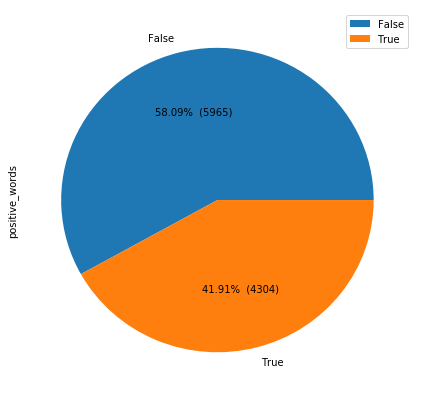

In [277]:
data_positive_likes = data_train['positive_words'].value_counts()
data_positive_likes.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_likes));

### Pie about numbers of words with positive feeling in the definition

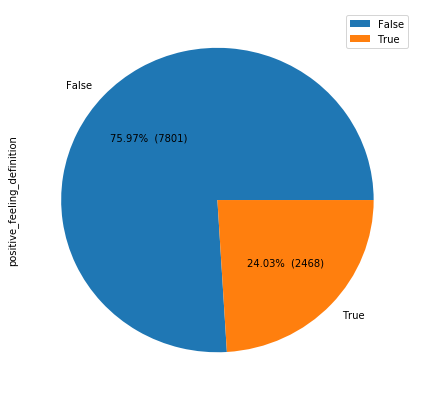

In [278]:
data_train['positive_feeling_definition'] = data_train['statement_feeling_score'] > 0
data_positive_feeling_definition = data_train['positive_feeling_definition'].value_counts()
data_positive_feeling_definition.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(data_positive_feeling_definition));

### Fake news has more negative sentiments - because of the kind of topics and the words used.

In [279]:
#The key finding from the team's analysis was that, on average, the fake news headlines were more negative 
#than the mainstream ones in each period. Of course, that just shows "that fake news headlines contain more 
#negative words in the title than real news," research scientist Haewoon Kwak told Engadget.
#Inferring meaning from this requires some guesswork, and there are two possible explanations, according to Kwak. Either fake news writers are intentionally doing this for "clickbait" purposes, or they "naturally use more negative words" because of the topics they're writing about.

# Reference : https://www.engadget.com/2016/11/21/clickbait-fake-news-and-the-power-of-feeling/

## Feature Extraction using TF-IDF,word2vec

In [280]:
#Before we can train an algorithm to classify fake news labels, we need to extract features from it. It means reducing 
#the mass of unstructured data into some uniform set of attributes that an algorithm can understand. 
#For fake news detection, it could be word counts (bag of words). 

In [281]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [282]:
#creating feature vector - document term matrix
countV = CountVectorizer()
train_count = countV.fit_transform(data_train['statement'].values)

In [283]:
print(countV)
print(train_count)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3243)	1
  (0, 7685)	1
  (0, 585)	1
  (0, 11243)	1
  (0, 10983)	1
  (0, 10656)	1
  (0, 5078)	1
  (0, 8333)	1
  (0, 6598)	1
  (0, 1013)	1
  (0, 10935)	1
  (0, 9626)	1
  (1, 720)	1
  (1, 1933)	1
  (1, 4874)	1
  (1, 8511)	1
  (1, 5648)	1
  (1, 1501)	1
  (1, 11057)	1
  (1, 10927)	1
  (1, 7631)	1
  (1, 11085)	1
  (1, 4824)	1
  (1, 7377)	1
  (1, 10375)	2
  :	:
  (10268, 6812)	1
  (10268, 10541)	1
  (10268, 3953)	1
  (10268, 10865)	1
  (10268, 8949)	1
  (10268, 10607)	1
  (10268, 2515)	1
  (10268, 11569)	1
  (10268, 2534)	1
  (10268, 768)	1
  (10268, 11607)	2
  (10268, 12104)	1
  (10268, 3274)	1
  (10268, 10951)	1
  (10

In [285]:
#vocab size
train_count.shape

#check vocabulary using below command
print(countV.vocabulary_)

{'says': 9626, 'the': 10935, 'annies': 1013, 'list': 6598, 'political': 8333, 'group': 5078, 'supports': 10656, 'third': 10983, 'trimester': 11243, 'abortions': 585, 'on': 7685, 'demand': 3243, 'when': 11880, 'did': 3399, 'decline': 3150, 'of': 7629, 'coal': 2442, 'start': 10374, 'it': 6013, 'started': 10375, 'natural': 7377, 'gas': 4824, 'took': 11085, 'off': 7631, 'that': 10927, 'to': 11057, 'begin': 1501, 'in': 5648, 'president': 8511, 'george': 4874, 'bushs': 1933, 'administration': 720, 'hillary': 5362, 'clinton': 2411, 'agrees': 825, 'with': 11973, 'john': 6093, 'mccain': 6926, 'by': 1958, 'voting': 11695, 'give': 4918, 'bush': 1931, 'benefit': 1538, 'doubt': 3649, 'iran': 5960, 'health': 5272, 'care': 2065, 'reform': 9052, 'legislation': 6461, 'is': 5975, 'likely': 6564, 'mandate': 6793, 'free': 4699, 'sex': 9873, 'change': 2225, 'surgeries': 10668, 'economic': 3807, 'turnaround': 11298, 'at': 1228, 'end': 3954, 'my': 7333, 'term': 10886, 'chicago': 2281, 'bears': 1475, 'have': 

In [286]:
#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

In [287]:
print(train_tfidf)

  (0, 9626)	0.11059590347781546
  (0, 10935)	0.06779891387915939
  (0, 1013)	0.42672073687857204
  (0, 6598)	0.3215868394934666
  (0, 8333)	0.28556599889671574
  (0, 5078)	0.2927765659166774
  (0, 10656)	0.26712099494824343
  (0, 10983)	0.2746475467653456
  (0, 11243)	0.4085917177272403
  (0, 585)	0.28851508930515957
  (0, 7685)	0.134228161963525
  (0, 3243)	0.3397158586447984
  (1, 10935)	0.0535666676950447
  (1, 11880)	0.30084182401691434
  (1, 3399)	0.1839256454824711
  (1, 3150)	0.2840113366644489
  (1, 7629)	0.07063415878207531
  (1, 2442)	0.25086615700805426
  (1, 10374)	0.24391719716232654
  (1, 6013)	0.12965684397676613
  (1, 10375)	0.45918758897177264
  (1, 7377)	0.2540798130918345
  (1, 4824)	0.20468971351416215
  (1, 11085)	0.1846251902747174
  (1, 7631)	0.19431990720999015
  :	:
  (10268, 10935)	0.04527055668099121
  (10268, 7629)	0.11938945715131273
  (10268, 11057)	0.12327251772550725
  (10268, 5229)	0.09311605601576281
  (10268, 7785)	0.129564636139765
  (10268, 7781)	0.

In [288]:
    
#vocab size
train_count.shape

#check vocabulary using below command
print(countV.vocabulary_)

#get feature names
print(countV.get_feature_names()[:25])


#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

{'says': 9626, 'the': 10935, 'annies': 1013, 'list': 6598, 'political': 8333, 'group': 5078, 'supports': 10656, 'third': 10983, 'trimester': 11243, 'abortions': 585, 'on': 7685, 'demand': 3243, 'when': 11880, 'did': 3399, 'decline': 3150, 'of': 7629, 'coal': 2442, 'start': 10374, 'it': 6013, 'started': 10375, 'natural': 7377, 'gas': 4824, 'took': 11085, 'off': 7631, 'that': 10927, 'to': 11057, 'begin': 1501, 'in': 5648, 'president': 8511, 'george': 4874, 'bushs': 1933, 'administration': 720, 'hillary': 5362, 'clinton': 2411, 'agrees': 825, 'with': 11973, 'john': 6093, 'mccain': 6926, 'by': 1958, 'voting': 11695, 'give': 4918, 'bush': 1931, 'benefit': 1538, 'doubt': 3649, 'iran': 5960, 'health': 5272, 'care': 2065, 'reform': 9052, 'legislation': 6461, 'is': 5975, 'likely': 6564, 'mandate': 6793, 'free': 4699, 'sex': 9873, 'change': 2225, 'surgeries': 10668, 'economic': 3807, 'turnaround': 11298, 'at': 1228, 'end': 3954, 'my': 7333, 'term': 10886, 'chicago': 2281, 'bears': 1475, 'have': 

In [289]:
#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])


    #create tf-df frequency features
    #tf-idf 
    tfidfV = TfidfTransformer()
    train_tfidf = tfidfV.fit_transform(train_count)

In [290]:
def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])


    #bag of words - with n-grams
    #countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
    #tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

    tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)

In [291]:
#POS Tagging
import nltk
nltk.download('treebank')
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = data_train['statement']
 
print(training_sentences)

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\anuks\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
5        The Chicago Bears have had more starting quart...
6        Jim Dunnam has not lived in the district he re...
7        I'm the only person on this stage who has work...
8        However, it took $19.5 million in Oregon Lotte...
9        Says GOP primary opponents Glenn Grothman and ...
10       For the first time in history, the share of th...
11       Since 2000, nearly 12 million Americans have s...
12       When Mitt Romney was governor of Massachusetts...
13       The economy bled $24 billion due to the govern...
14       Most of

In [292]:
#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
}

In [89]:
#helper function to strip tags from tagged corpus	
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

###  GloVe (by Stanford) - https://nlp.stanford.edu/projects/glove/ 
### Global Vectors for word representations

In [293]:
#Using Glove
with open("glove.6B.50d.txt", "rb") as lines:
    w2v = {line.split()[0]: np.array(map(float, line.split()[1:]))
for line in lines}

In [294]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [295]:
train_tfidf.shape

(10269, 12142)

In [296]:
countV

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [302]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_subjects['subject'].values)
print(vectorizer.get_feature_names())

['abortion', 'accomplishments', 'biography', 'campaignfinance', 'deficit', 'education', 'energy', 'environment', 'ethics', 'federalbudget', 'foreignpolicy', 'guns', 'healthcare', 'history', 'immigration', 'iraq', 'jobs', 'legalissues', 'socialsecurity', 'statebudget', 'terrorism', 'transportation']


In [21]:
from sklearn.feature_extraction.text import HashingVectorizer
# create the transform
vectorizer = HashingVectorizer(n_features=5)
# encode document
vector = vectorizer.transform(data_train['statement'].values)
# summarize encoded vector
print(vector.shape)
# a1x1 (30% for political affiliation)
print(vector.toarray() * 0.26)

(10269, 5)
[[-0.09192388 -0.09192388  0.09192388 -0.18384776 -0.09192388]
 [-0.21633308  0.07211103  0.07211103 -0.07211103  0.07211103]
 [-0.05964809  0.11929618 -0.11929618 -0.17894427 -0.05964809]
 ...
 [-0.07211103  0.14422205 -0.14422205 -0.14422205  0.        ]
 [-0.06128259  0.         -0.12256518 -0.18384776  0.12256518]
 [-0.12172279  0.18258419 -0.0304307   0.0608614  -0.12172279]]


### Classification

In [470]:
import DataPrep
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [471]:
train_news = pd.read_csv('C:/Fall2018/ML/AlternusVera_anusebastian/train.csv')
test_news = pd.read_csv('C:/Fall2018/ML/AlternusVera_anusebastian/test.csv')
valid_news = pd.read_csv('C:/Fall2018/ML/AlternusVera_anusebastian/valid.csv')

In [472]:
DataPrep.train_news

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [473]:
test_news

,Label,Statement,Party_Affiliation
0,TRUE,Building a wall on the U.S.-Mexico border will...,republican
1,FALSE,Wisconsin is on pace to double the number of l...,democrat
2,FALSE,Says John McCain has done nothing to help the ...,republican
3,half-true,Suzanne Bonamici supports a plan that will cut...,republican
4,pants-fire,When asked by a reporter whether hes at the ce...,democrat
5,TRUE,Over the past five years the federal governmen...,republican
6,TRUE,Says that Tennessee law requires that schools ...,none
7,barely-true,"Says Vice President Joe Biden ""admits that the...",republican
8,TRUE,Donald Trump is against marriage equality. He ...,democrat
9,barely-true,We know that more than half of Hillary Clinton...,republican


In [474]:
#string to test
doc_new = ['obama is running for president in 2022']

In [475]:

DataPrep.data_obs()


training dataset size:
(10240, 2)
                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True
5  The Chicago Bears have had more starting quart...   True
6  Jim Dunnam has not lived in the district he re...  False
7  I'm the only person on this stage who has work...   True
8  However, it took $19.5 million in Oregon Lotte...   True
9  Says GOP primary opponents Glenn Grothman and ...   True
(2551, 2)
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suzanne Bonamici supports a plan that will cut...   T

In [476]:
#first we will use bag of words techniques

#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',FeatureSelection.countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb = nb_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb == DataPrep.test_news['Label'])

0.6072128577028616

In [477]:
#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',FeatureSelection.countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR = logR_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR == DataPrep.test_news['Label'])


0.5985887887103096

In [478]:
#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',FeatureSelection.countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm = svm_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm == DataPrep.test_news['Label'])

0.5723245785966288

In [479]:
#using SVM Stochastic Gradient Descent on hinge loss
sgd_pipeline = Pipeline([
        ('svm2CV',FeatureSelection.countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd = sgd_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd == DataPrep.test_news['Label'])


#random forest
random_forest = Pipeline([
        ('rfCV',FeatureSelection.countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf = random_forest.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf == DataPrep.test_news['Label'])

C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.6209329674637397

### Random Forest gives a better accuracy compared to the other algorithms  : 62%

In [480]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n=len(DataPrep.train_news), n_folds=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold:
        train_text = DataPrep.train_news.iloc[train_ind]['Statement'] 
        train_y = DataPrep.train_news.iloc[train_ind]['Label']
    
        test_text = DataPrep.train_news.iloc[test_ind]['Statement']
        test_y = DataPrep.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(DataPrep.train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))
    
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

Total statements classified: 10240
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]
Total statements classified: 10240
Score: 0.6469090977975251
score length 5
Confusion matrix:
[[2252 2236]
 [1933 3819]]
Total statements classified: 10240
Score: 0.6104687487924283
score length 5
Confusion matrix:
[[2260 2228]
 [2246 3506]]


C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

Total statements classified: 10240
Score: 0.6608339887846906
score length 5
Confusion matrix:
[[2092 2396]
 [1718 4034]]
Total statements classified: 10240
Score: 0.7009099258039739
score length 5
Confusion matrix:
[[1787 2701]
 [1191 4561]]


(None, None, None, None, None)

In [482]:

"""So far we have used bag of words technique to extract the features and passed those featuers into classifiers. We have also seen the
f1 scores of these classifiers. now lets enhance these features using term frequency weights with various n-grams
"""

##Now using n-grams
#naive-bayes classifier
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',FeatureSelection.tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb_ngram == DataPrep.test_news['Label'])

0.5938847510780086

In [483]:
#logistic regression classifier
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',FeatureSelection.tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR_ngram == DataPrep.test_news['Label'])


0.6193649549196394

In [484]:
#linear SVM classifier
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',FeatureSelection.tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm_ngram == DataPrep.test_news['Label'])

0.6170129361034888

In [485]:

#sgd classifier
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',FeatureSelection.tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
         ])

sgd_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd_ngram == DataPrep.test_news['Label'])



C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.5417483339866719

In [486]:

#random forest classifier
random_forest_ngram = Pipeline([
        ('rf_tfidf',FeatureSelection.tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])
    
random_forest_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf_ngram == DataPrep.test_news['Label'])

0.6005488043904351

In [487]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)

Total statements classified: 10240
Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]
Total statements classified: 10240
Score: 0.7044355553757985
score length 5
Confusion matrix:
[[1580 2908]
 [1043 4709]]
Total statements classified: 10240
Score: 0.6790920142902143
score length 5
Confusion matrix:
[[2016 2472]
 [1524 4228]]


C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

Total statements classified: 10240
Score: 0.7190302107700948
score length 5
Confusion matrix:
[[   6 4482]
 [   7 5745]]
Total statements classified: 10240
Score: 0.6596468674522556
score length 5
Confusion matrix:
[[2007 2481]
 [1700 4052]]


(None, None, None, None, None)

In [489]:
print(classification_report(DataPrep.test_news['Label'], predicted_nb_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_LogR_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_svm_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_sgd_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_rf_ngram))

DataPrep.test_news['Label'].shape

             precision    recall  f1-score   support

      False       0.72      0.19      0.30      1169
       True       0.58      0.94      0.71      1382

avg / total       0.64      0.59      0.52      2551

             precision    recall  f1-score   support

      False       0.64      0.39      0.49      1169
       True       0.61      0.81      0.70      1382

avg / total       0.62      0.62      0.60      2551

             precision    recall  f1-score   support

      False       0.61      0.47      0.53      1169
       True       0.62      0.74      0.68      1382

avg / total       0.62      0.62      0.61      2551

             precision    recall  f1-score   support

      False       0.00      0.00      0.00      1169
       True       0.54      1.00      0.70      1382

avg / total       0.29      0.54      0.38      2551

             precision    recall  f1-score   support

      False       0.58      0.49      0.53      1169
       True       0.62      0.70 

C:\Users\anuks\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(2551,)

## Polynomial Equation 

### Our % vector polynomial equation values for polynomial equation are as follows,


#### Anu Sebastian
- x1: Political Affiliation - Complex Feature
- x2: Social Media          - Non-complex Feature

#### Ravali Nagabandi    
- x3:Bias                   - Complex Feature
- x4:Credibilty             - Non-complex Feature
        
#### Saloni Sharad Bhalearo 
- x5:Credibilty             - Complex Feature
- x6:Fact Checks            - Non-complex Feature

The polynomial equation is

= a1x1+ a2x2+ a3x3+ a4x4+ a5x5 +a6x6

= 0.26 * x1+ 0.07 * x2+ 0.25 * x3+ 0.08* x4+ 0.24 * x5 +0.1 * x6

=[[-0.09192388 -0.09192388  0.09192388 -0.18384776 -0.09192388]
 [-0.21633308  0.07211103  0.07211103 -0.07211103  0.07211103]
 [-0.05964809  0.11929618 -0.11929618 -0.17894427 -0.05964809]
 ...
 [-0.07211103  0.14422205 -0.14422205 -0.14422205  0.        ]
 [-0.06128259  0.         -0.12256518 -0.18384776  0.12256518]
 [-0.12172279  0.18258419 -0.0304307   0.0608614  -0.12172279]]   +

 [[ 0.01560379  0.05851421  0.01170284  0.02340568  0.02340568]
 [-0.06413231  0.02494034 -0.00712581  0.          0.01068872]
 [-0.03454313  0.04251462  0.02657164  0.03454313  0.        ]
 ...
 [-0.01979487  0.05855981  0.01979487  0.01072222 -0.0239188 ]
 [-0.01800206  0.06480741  0.01080123  0.01440165 -0.00720082]
 [-0.0224777   0.06570405  0.00691622  0.00172905 -0.00518716]]  +
 
[[-0.08838835 -0.08838835  0.08838835 -0.1767767  -0.08838835]
 [-0.20801257  0.06933752  0.06933752 -0.06933752  0.06933752]
 [-0.05735393  0.11470787 -0.11470787 -0.1720618  -0.05735393]
 ...
 [-0.06933752  0.13867505 -0.13867505 -0.13867505  0.        ]
 [-0.05892557  0.         -0.11785113 -0.1767767   0.11785113]
 [-0.11704115  0.17556172 -0.02926029  0.05852057 -0.11704115]]  + 
 
 [[-0.016       0.032       0.         -0.064      -0.032     ]
 [-0.06672461 -0.01668115  0.01668115  0.01668115  0.03336231]
 [ 0.03124534  0.04166045  0.04166045  0.03124534  0.03124534]
 ...
 [ 0.         -0.04618802 -0.04618802  0.          0.04618802]
 [-0.02309401  0.         -0.02309401  0.06928203 -0.02309401]
 [ 0.03236159  0.04314879  0.0215744   0.05393599 -0.0107872 ]]  +


[[-0.08838835 -0.08838835  0.08838835 -0.1767767  -0.08838835]
 [-0.20801257  0.06933752  0.06933752 -0.06933752  0.06933752]
 [-0.05735393  0.11470787 -0.11470787 -0.1720618  -0.05735393]
 ...
 [-0.06933752  0.13867505 -0.13867505 -0.13867505  0.        ]
 [-0.05892557  0.         -0.11785113 -0.1767767   0.11785113]
 [-0.11704115  0.17556172 -0.02926029  0.05852057 -0.11704115]]   +
 
 [[ 0.         -0.1         0.          0.          0.        ]
 [ 0.          0.1         0.          0.          0.        ]
 [ 0.         -0.1         0.          0.          0.        ]
 ...
 [ 0.          0.07071068  0.         -0.07071068  0.        ]
 [ 0.         -0.05773503  0.05773503  0.          0.05773503]
 [ 0.         -0.05773503  0.05773503 -0.05773503  0.        ]]

### References:
- https://www.theguardian.com/books/2017/nov/02/fake-news-is-very-real-word-of-the-year-for-2017
- https://github.com/sumeetkr/AwesomeFakeNews
- https://www.pheme.eu/software-downloads/  
- https://towardsdatascience.com/understanding-feature-engineering-part-3-traditional-methods-for-text-data-f6f7d70acd41
- https://www.politico.com/tag/fake-news 
- https://nycdatascience.com/blog/student-works/identifying-fake-news-nlp/
- https://medium.com/@Genyunus/detecting-fake-news-with-nlp-c893ec31dee8
- https://medium.com/@ttr0002/looking-at-the-data-on-fake-news-f509178c9e51
- https://github.com/bs-detector/bs-detector
- https://opendata.stackexchange.com/questions/10584/what-are-the-available-datasets-for-fake-news-detection
- http://sdsawtelle.github.io/blog/output/spam-classification-part1-text-processing.html#Standardizing-White-Space-and-Total-Word-Count
- https://blog.insightdatascience.com/topic-modeling-and-sentiment-analysis-to-pinpoint-the-perfect-doctor-6a8fdd4a3904
- https://nlpforhackers.io/topic-modeling/